## MatPlotLib Notes

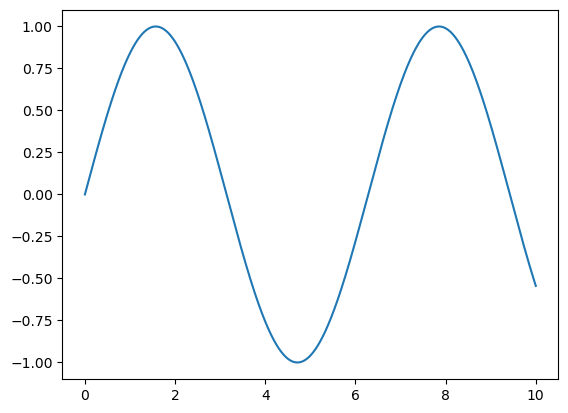

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,1000) #Creates linearly spaced 1000 points between 0 and 10
y = np.sin(x)
plt.plot(x,y) #Creates a line plot


<b>The above is a line plot by default. We may also draw scatter plots</b>

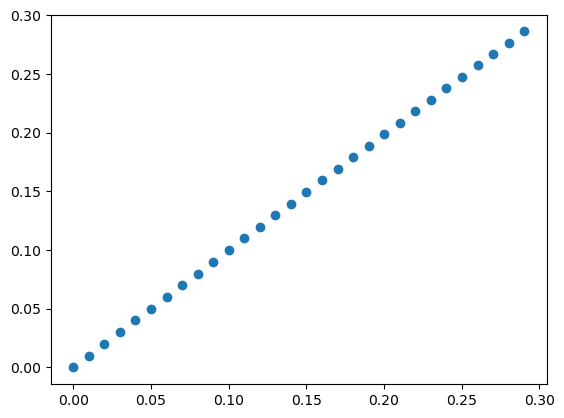

In [3]:
#Taking only 30 points so that the plot is clear
plt.scatter(x[:30], y[:30]) 

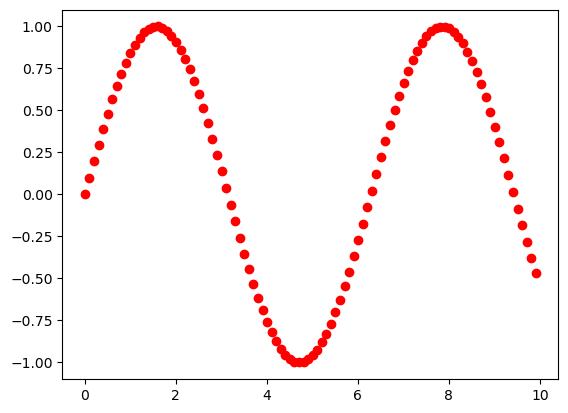

In [7]:
#Taking every 10th point for scatter plot and changing color
plt.scatter(x[::10], y[::10], color = 'red') 

<b>We may plot multiple graphs together</b>

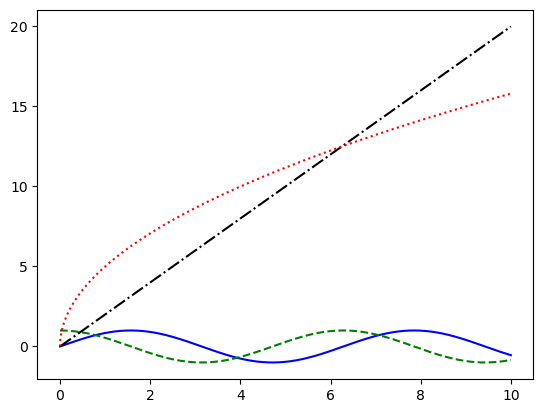

In [14]:
plt.plot(x,y, 'b')  # Solid blue
plt.plot(x,np.cos(x), '--g')  # Dashed green
plt.plot(x,2*x, '-.k')  # Dotted dash black
plt.plot(x,5*np.sqrt(x), ':r')  # Dotted Red

In [15]:
import pandas as pd

df = pd.read_csv('covid_19_data.csv')
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0          1       0          0  
1         14       0          0  
2          6       0          0  
3          1       0          0  
4          0       0          0

In [16]:
df.drop(['SNo','Last Update'], axis=1, inplace=True)

In [23]:
df.rename(columns={'ObservationDate':'Date', 'Province/State':'State','Country/Region':'Country'},inplace=True)

In [24]:
df.head()

Date      State         Country  Confirmed  Deaths  Recovered
0  01/22/2020      Anhui  Mainland China          1       0          0
1  01/22/2020    Beijing  Mainland China         14       0          0
2  01/22/2020  Chongqing  Mainland China          6       0          0
3  01/22/2020     Fujian  Mainland China          1       0          0
4  01/22/2020      Gansu  Mainland China          0       0          0

In [25]:
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
df.head()

Date      State         Country  Confirmed  Deaths  Recovered
0 2020-01-22      Anhui  Mainland China          1       0          0
1 2020-01-22    Beijing  Mainland China         14       0          0
2 2020-01-22  Chongqing  Mainland China          6       0          0
3 2020-01-22     Fujian  Mainland China          1       0          0
4 2020-01-22      Gansu  Mainland China          0       0          0

In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'constant')
df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
# Imputes all null values with constant
#df2 = df.fillna('NA')
df2

Date              State         Country Confirmed Deaths  \
0      2020-01-22              Anhui  Mainland China         1      0   
1      2020-01-22            Beijing  Mainland China        14      0   
2      2020-01-22          Chongqing  Mainland China         6      0   
3      2020-01-22             Fujian  Mainland China         1      0   
4      2020-01-22              Gansu  Mainland China         0      0   
...           ...                ...             ...       ...    ...   
306424 2021-05-29  Zaporizhia Oblast         Ukraine    102641   2335   
306425 2021-05-29            Zeeland     Netherlands     29147    245   
306426 2021-05-29           Zhejiang  Mainland China      1364      1   
306427 2021-05-29    Zhytomyr Oblast         Ukraine     87550   1738   
306428 2021-05-29       Zuid-Holland     Netherlands    391559   4252   

       Recovered  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
306424     95289  
306425         0  
306426      1324  
306427     83790  
306428         0  

[306429 rows x 6 columns]

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       306429 non-null  datetime64[ns]
 1   State      306429 non-null  object        
 2   Country    306429 non-null  object        
 3   Confirmed  306429 non-null  object        
 4   Deaths     306429 non-null  object        
 5   Recovered  306429 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 14.0+ MB


In [65]:
df3 = df2.groupby(['Country','Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [66]:
df3

Country       Date  Confirmed  Deaths  Recovered
0                          Azerbaijan 2020-02-28          1       0          0
1                     ('St. Martin',) 2020-03-10          2       0          0
2                         Afghanistan 2020-02-24          1       0          0
3                         Afghanistan 2020-02-25          1       0          0
4                         Afghanistan 2020-02-26          1       0          0
...                               ...        ...        ...     ...        ...
87276  occupied Palestinian territory 2020-03-12          0       0          0
87277  occupied Palestinian territory 2020-03-14          0       0          0
87278  occupied Palestinian territory 2020-03-15          0       0          0
87279  occupied Palestinian territory 2020-03-16          0       0          0
87280  occupied Palestinian territory 2020-03-17          0       0          0

[87281 rows x 5 columns]

In [69]:
countries = df3['Country'].unique()
len(countries)

229

<b>Graph to plot the data</b>

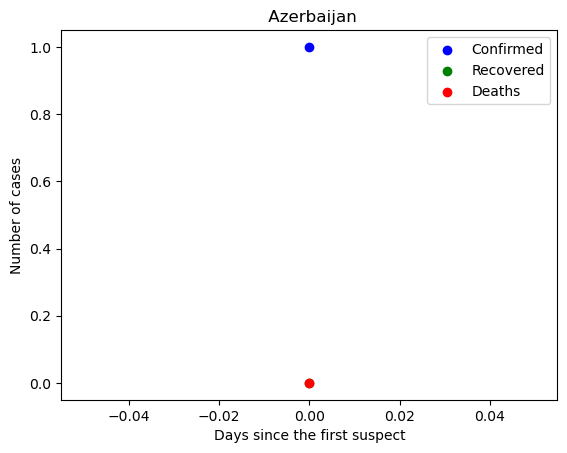

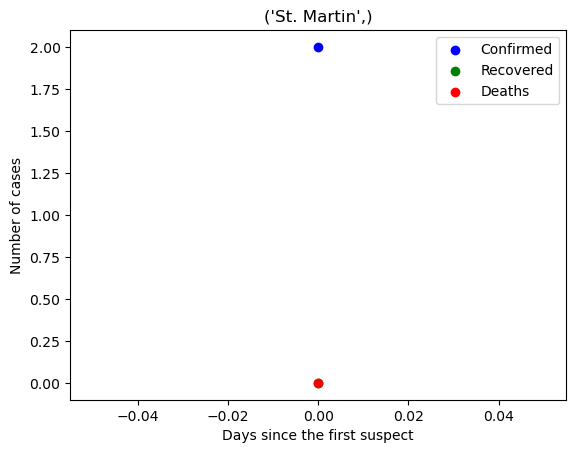

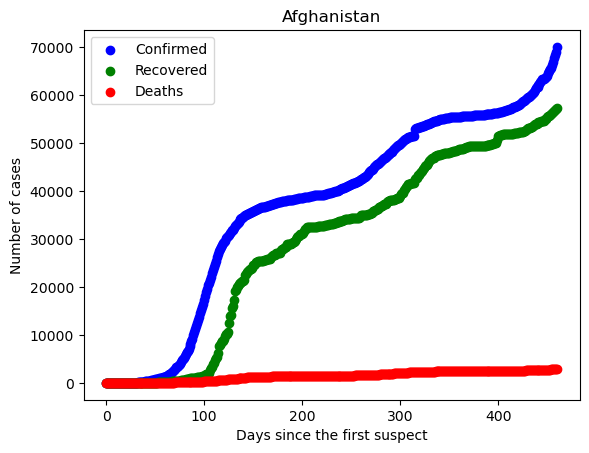

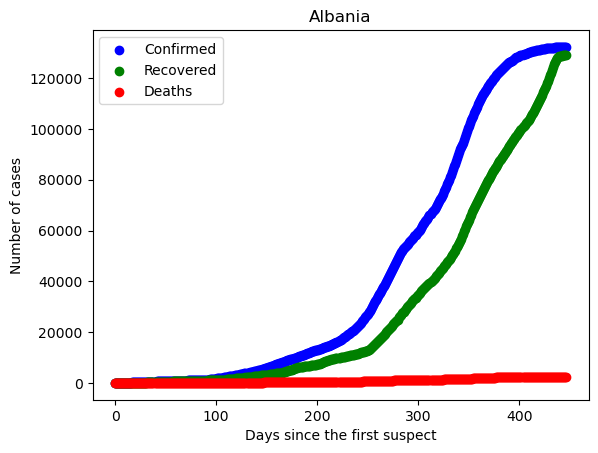

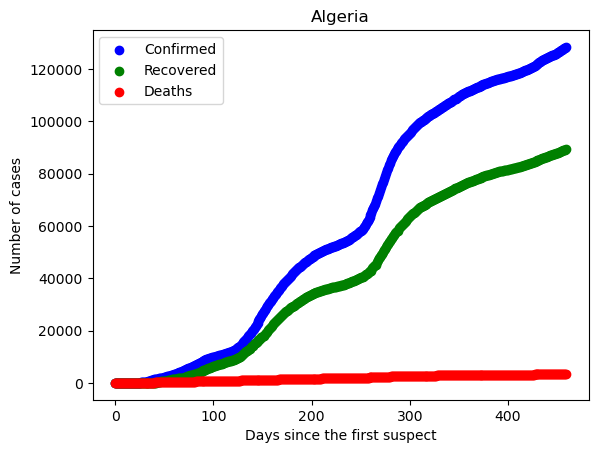

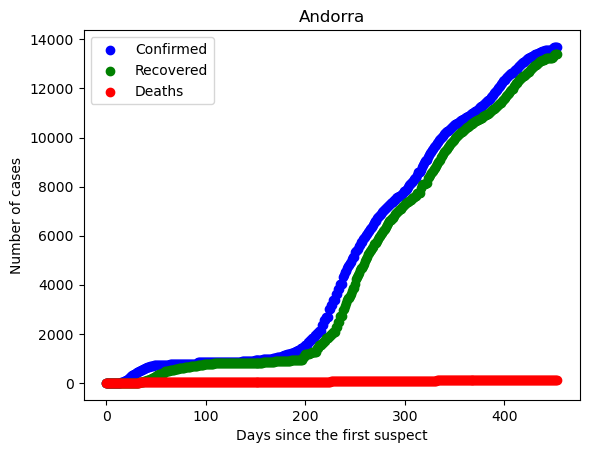

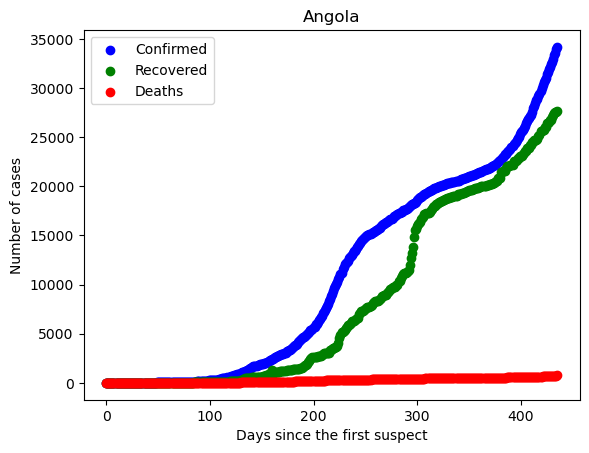

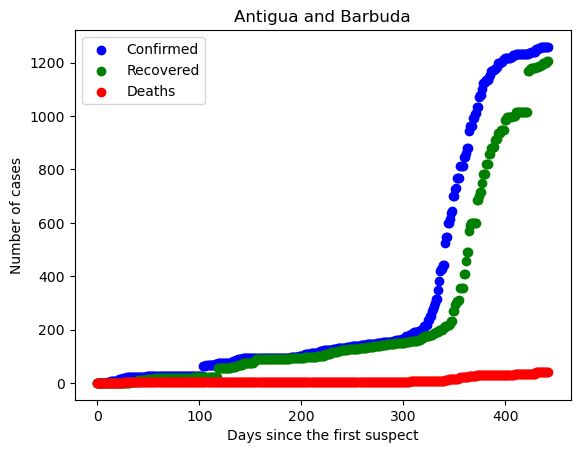

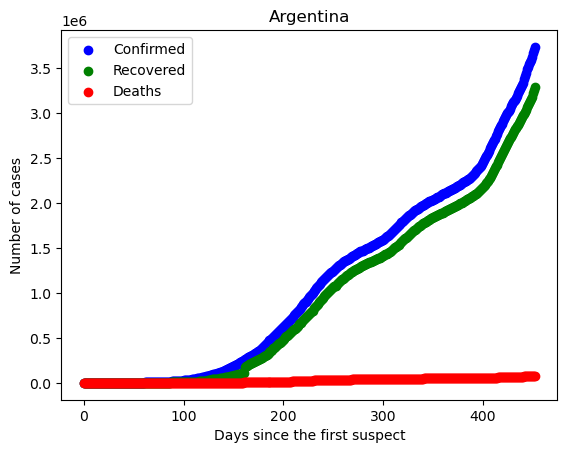

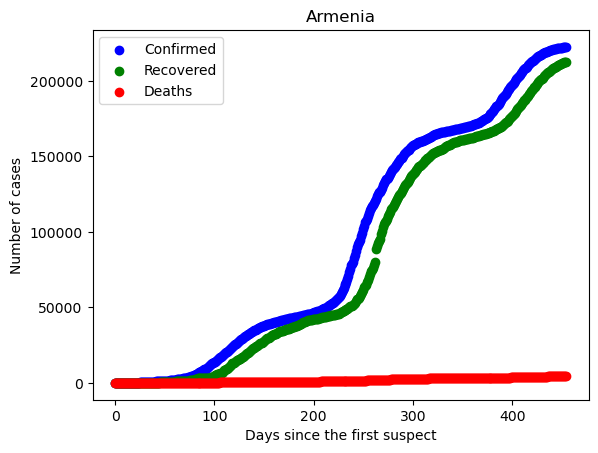

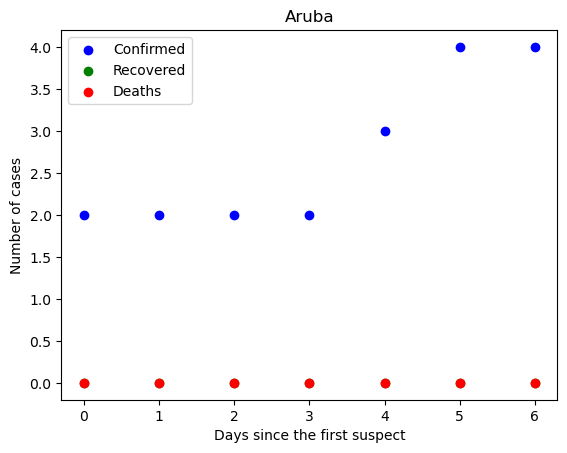

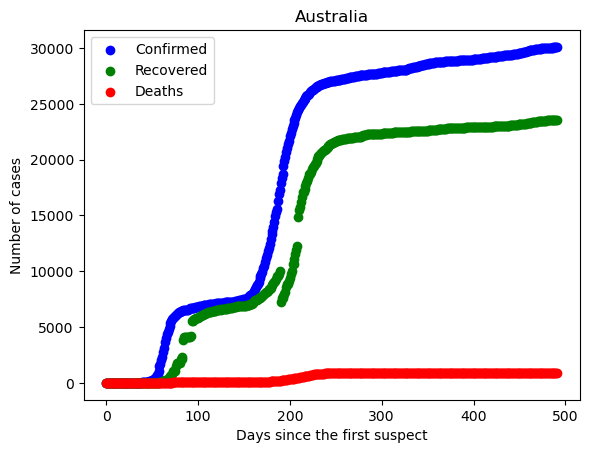

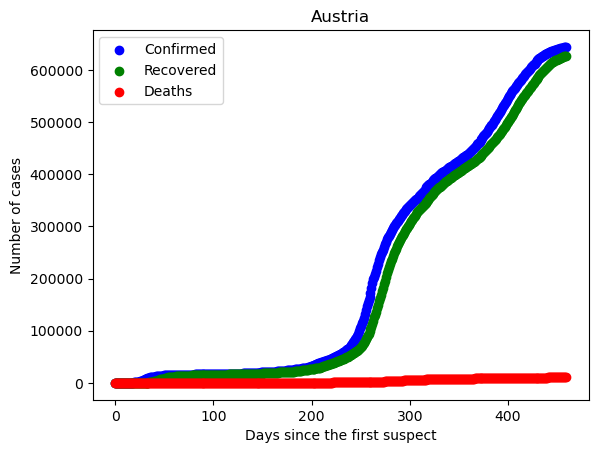

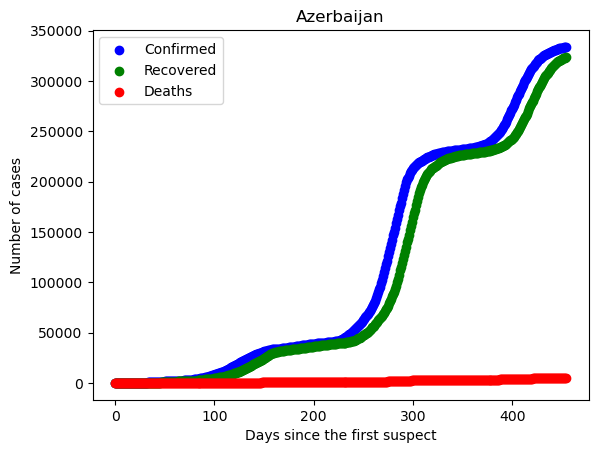

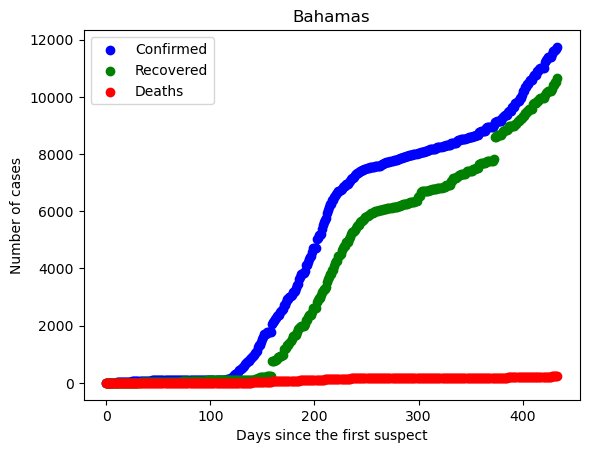

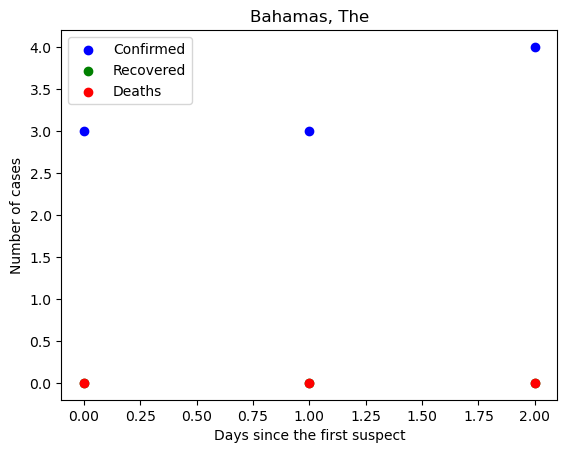

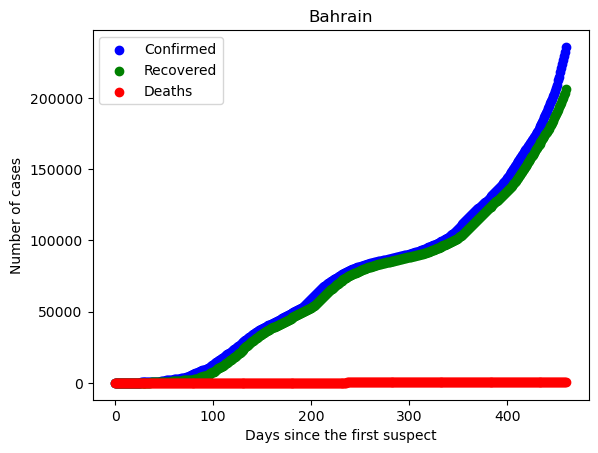

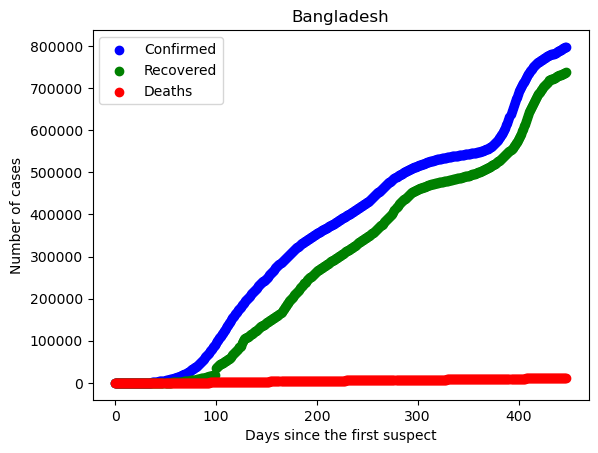

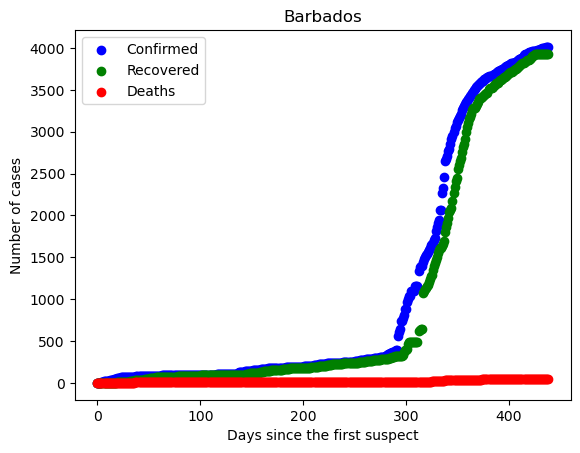

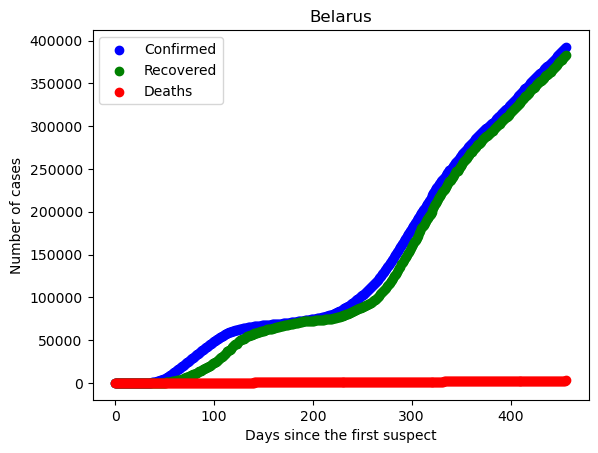

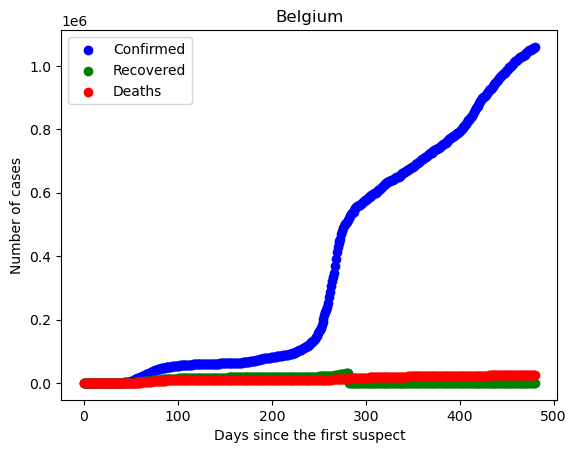

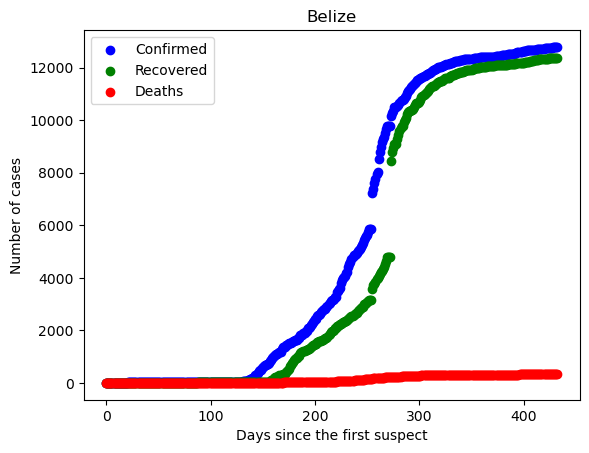

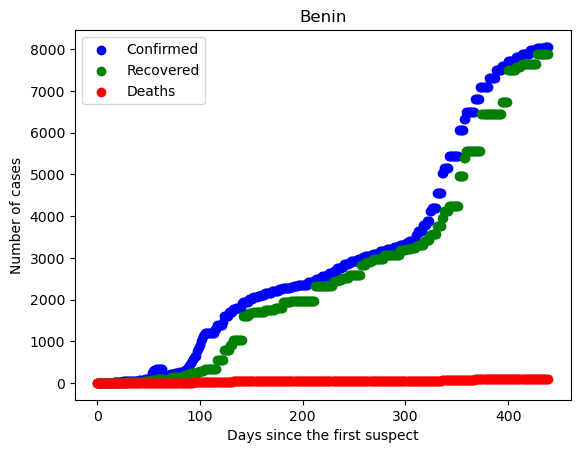

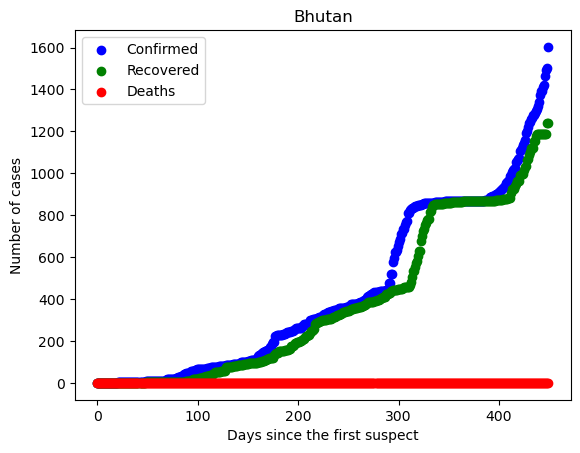

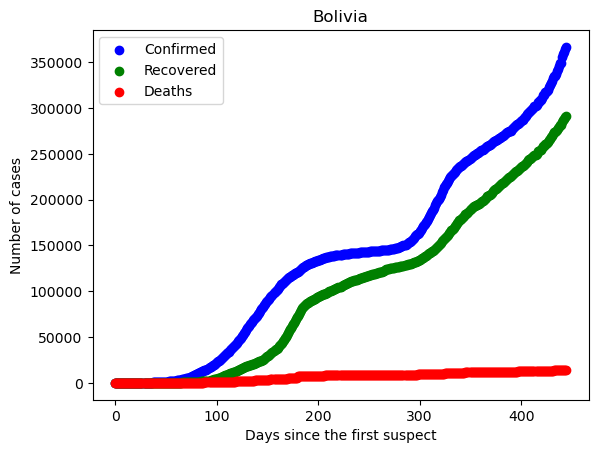

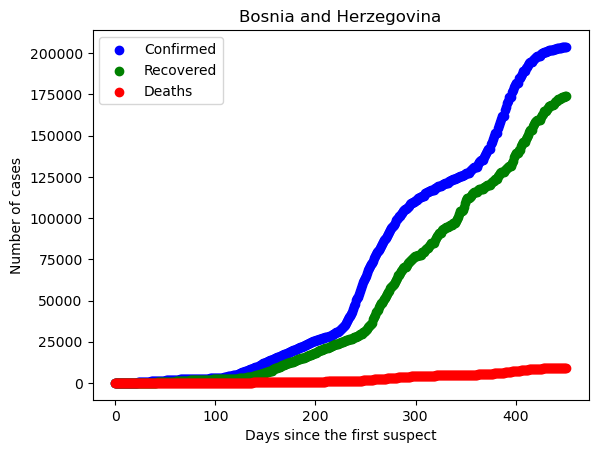

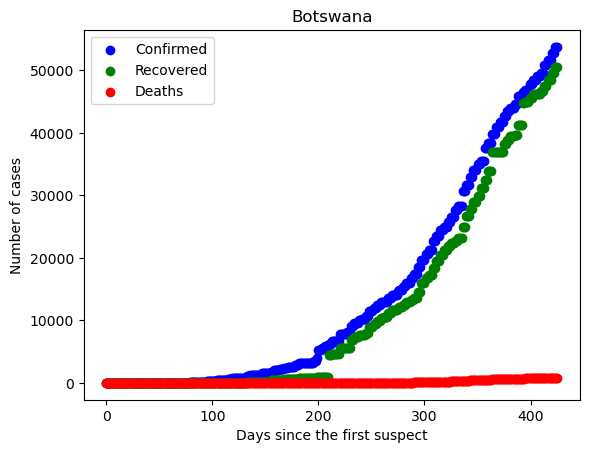

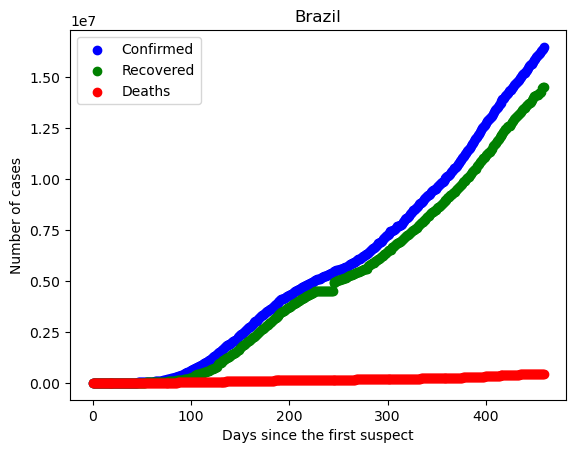

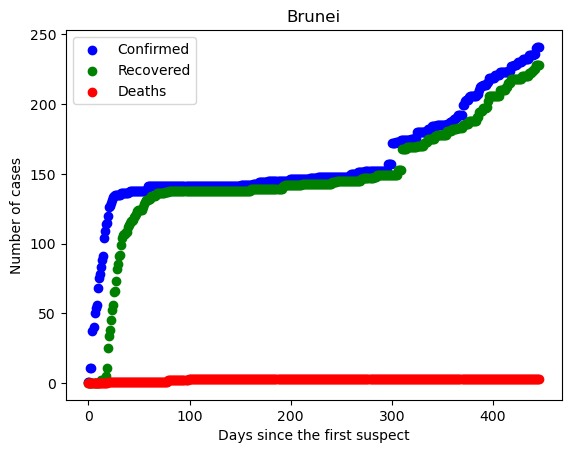

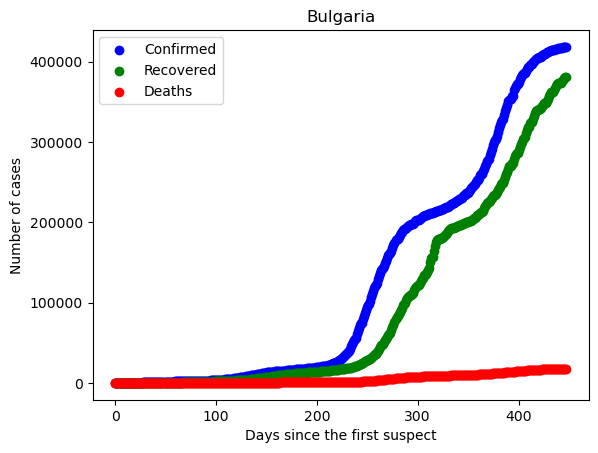

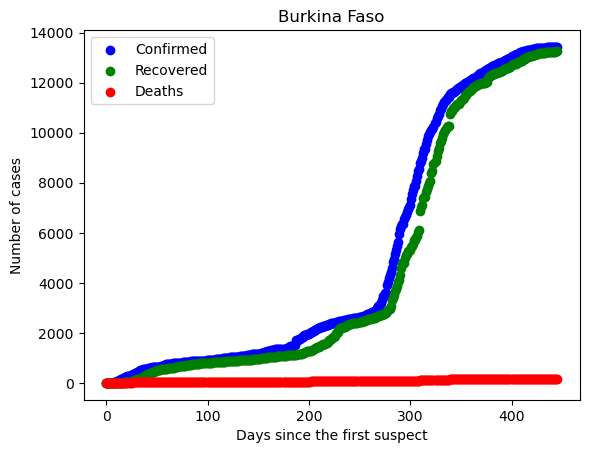

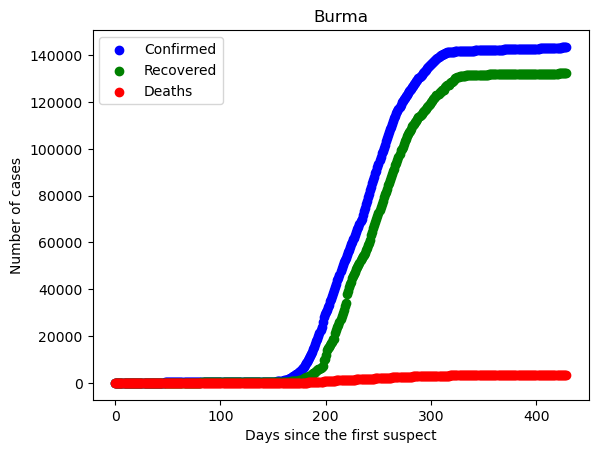

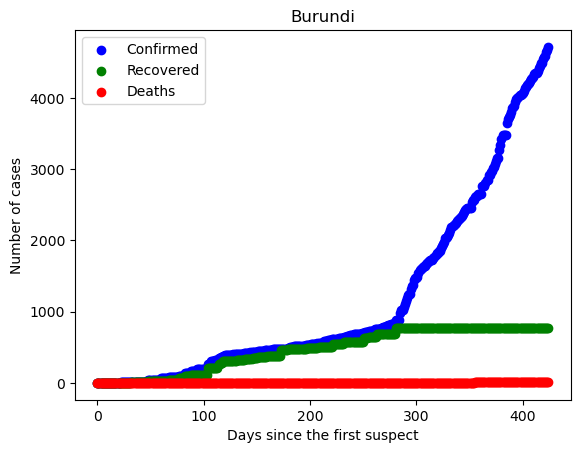

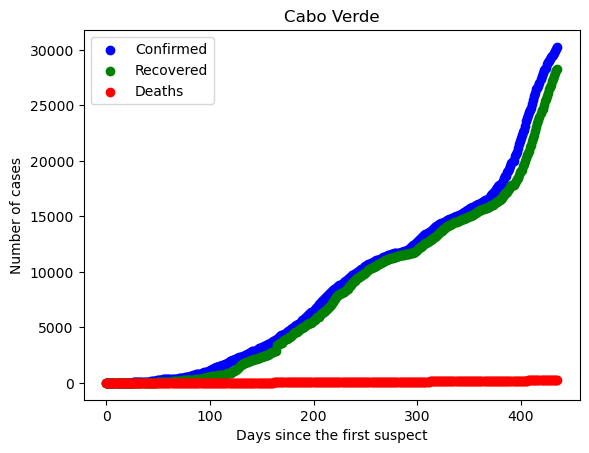

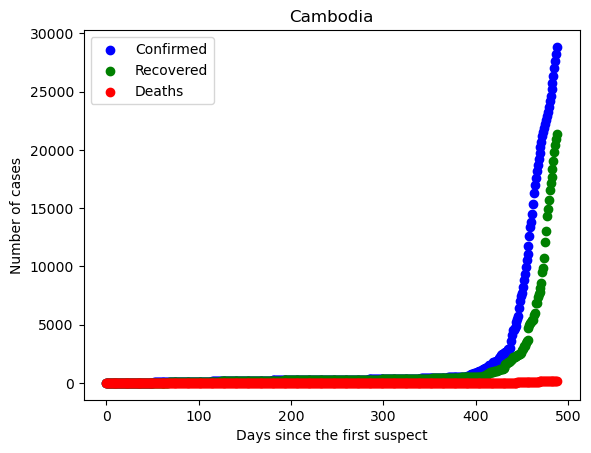

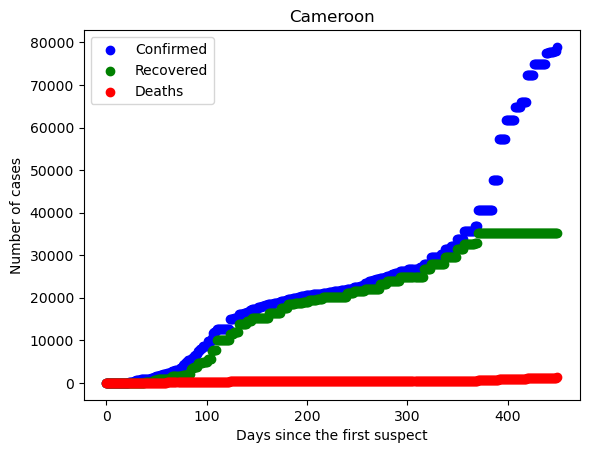

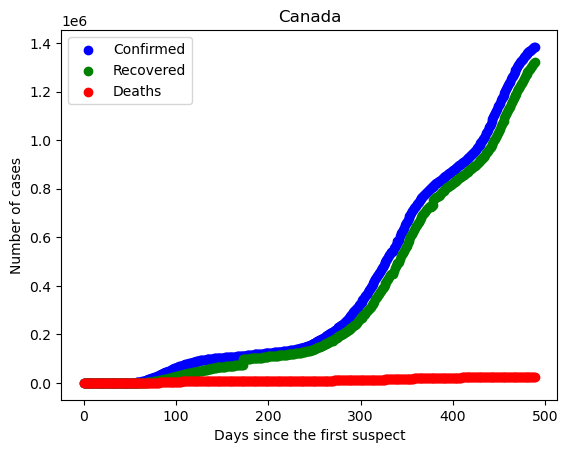

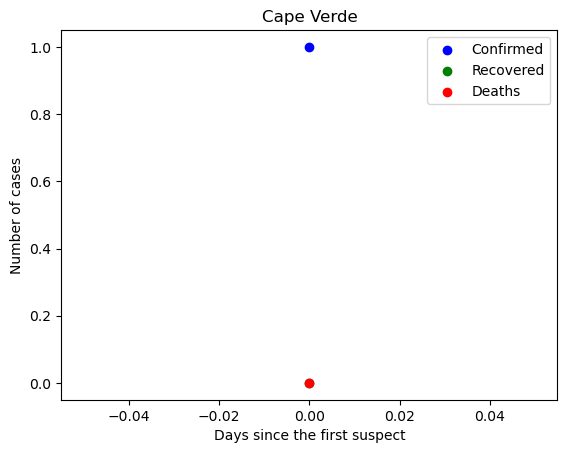

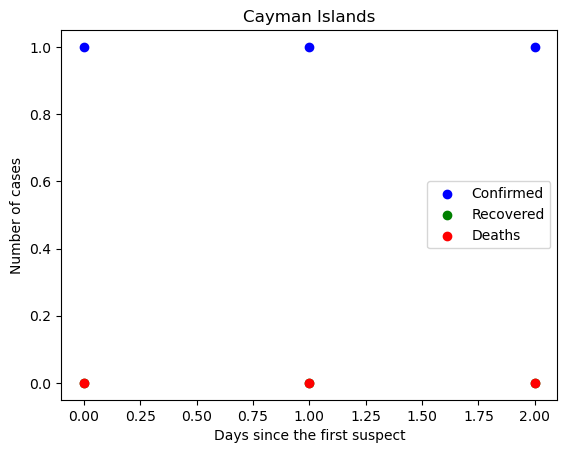

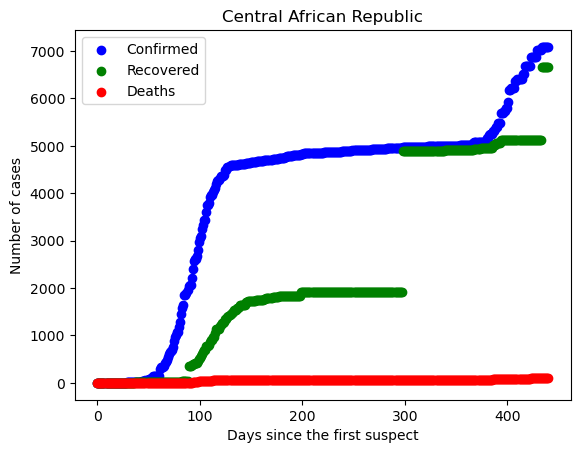

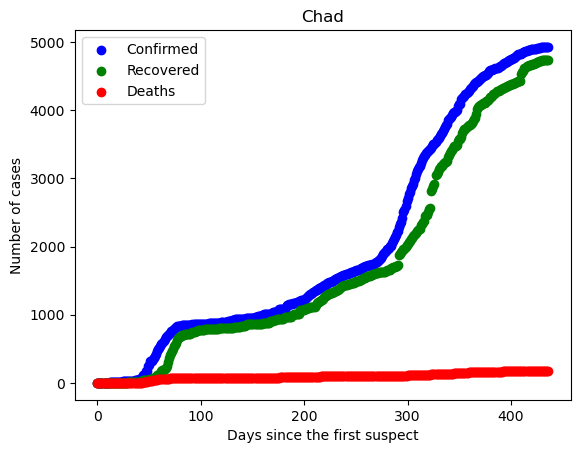

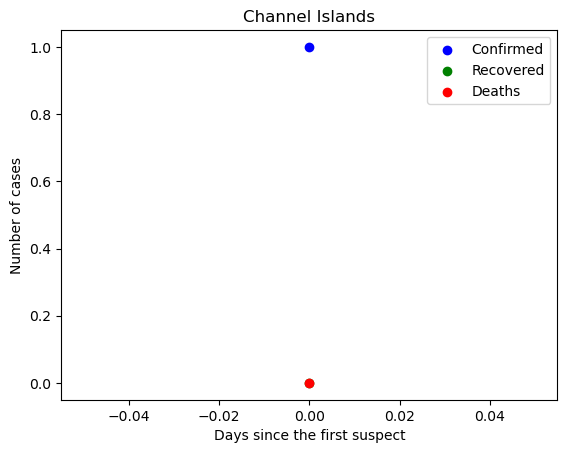

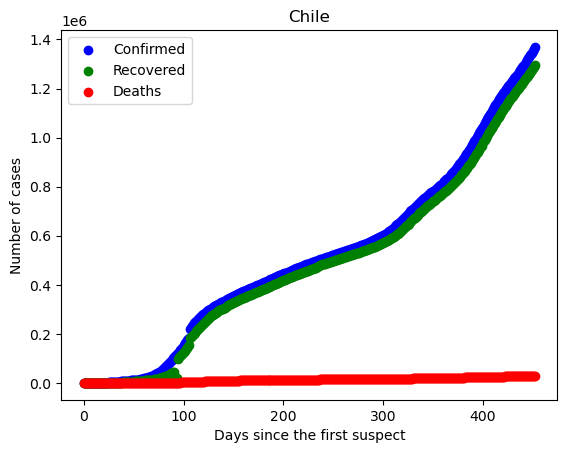

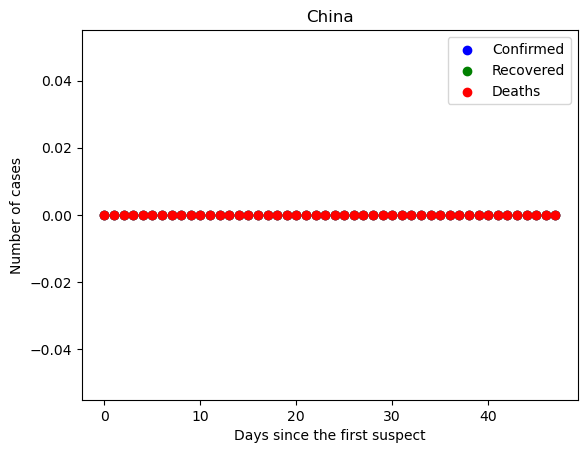

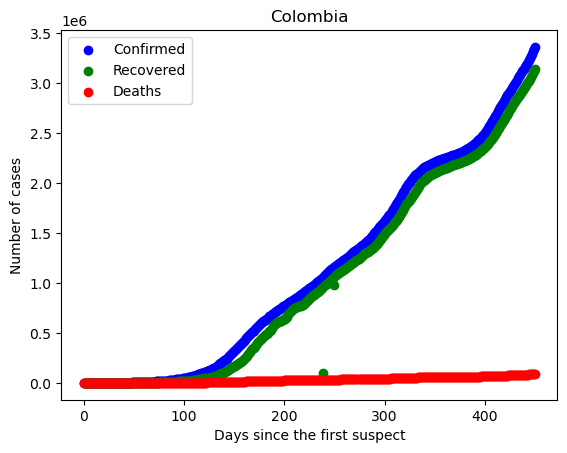

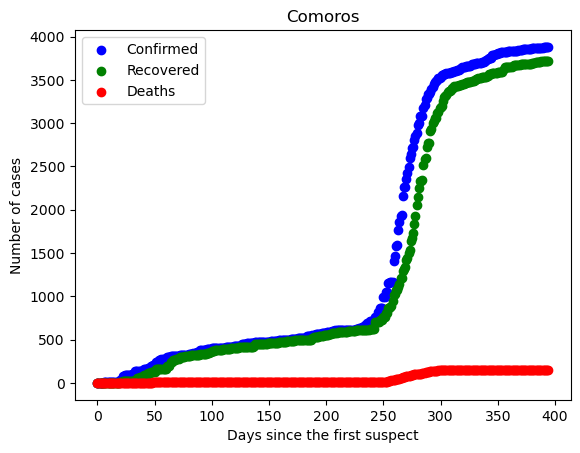

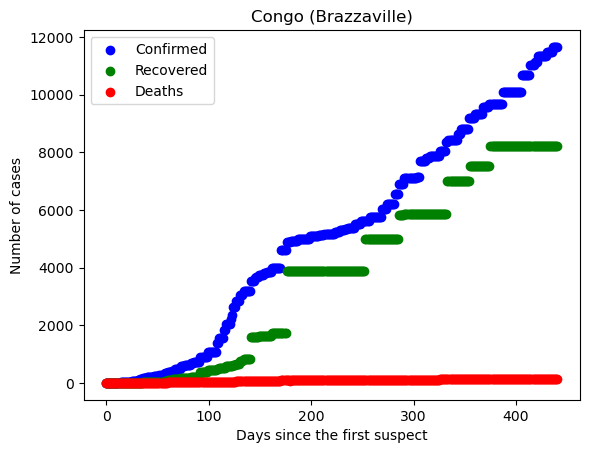

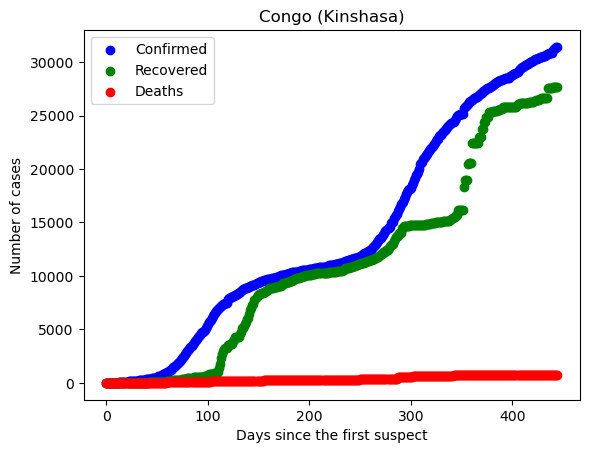

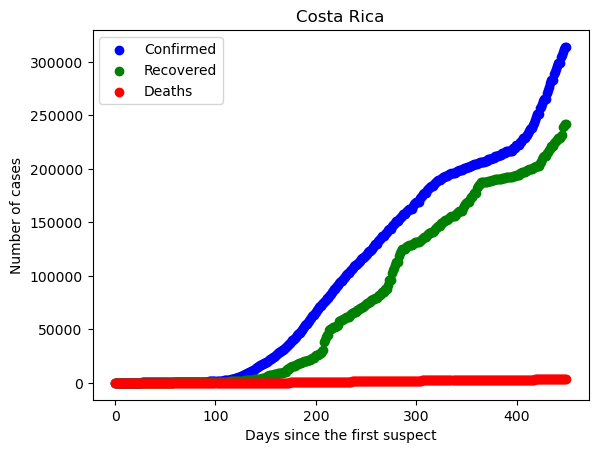

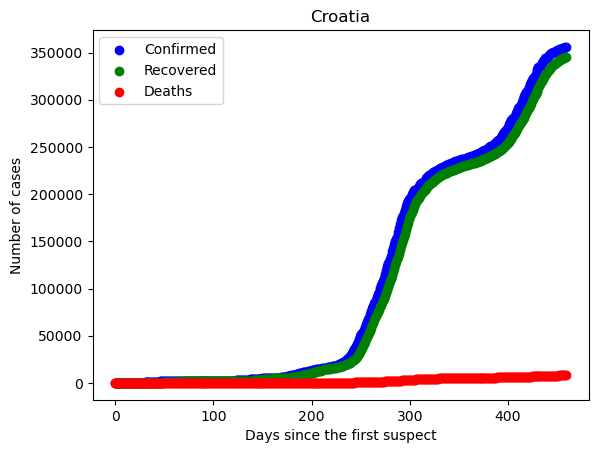

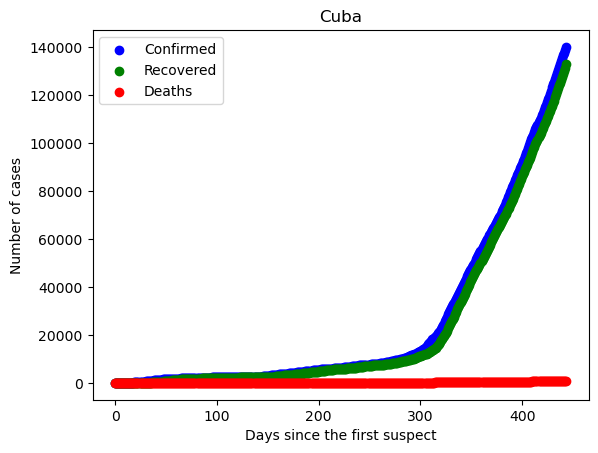

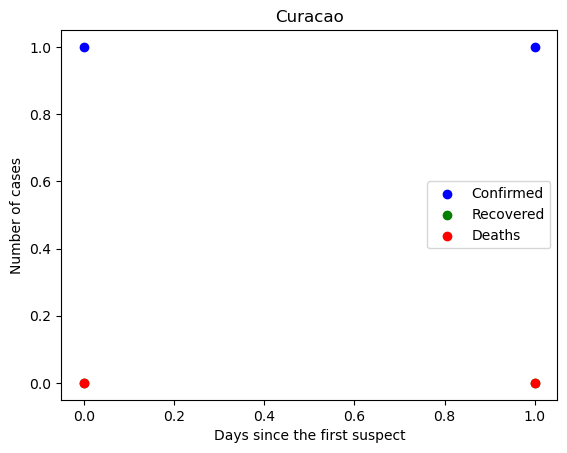

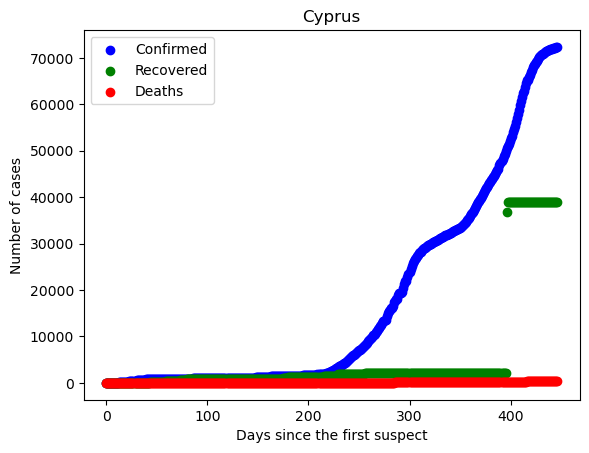

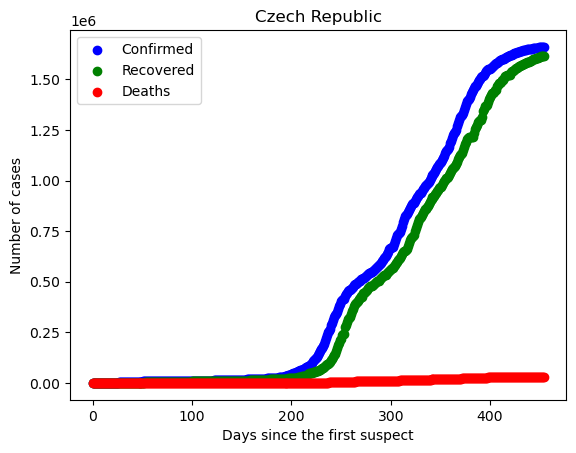

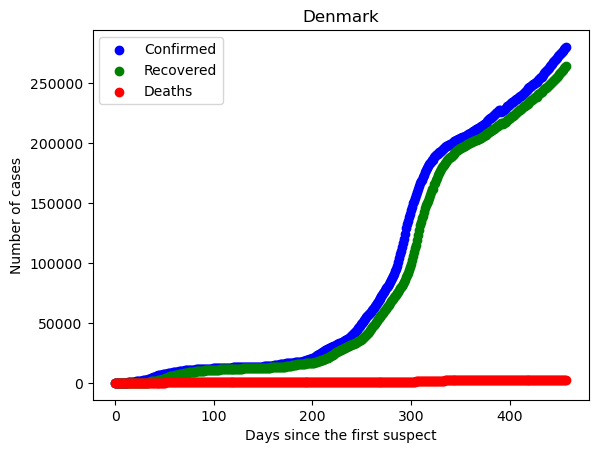

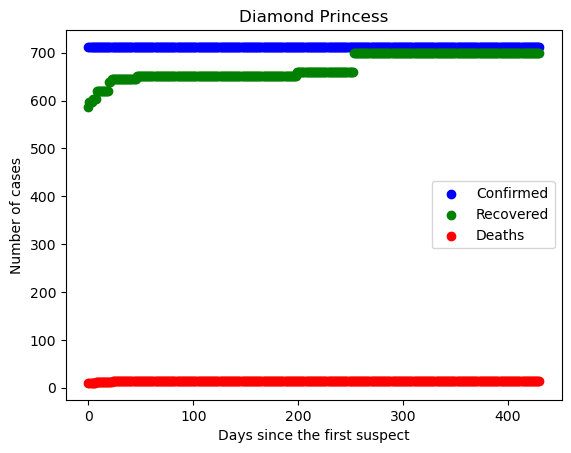

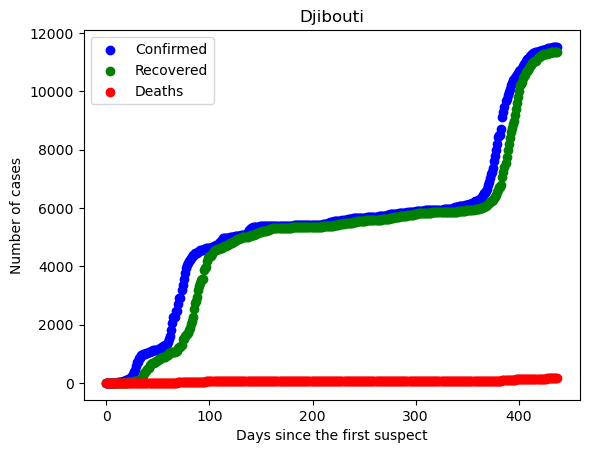

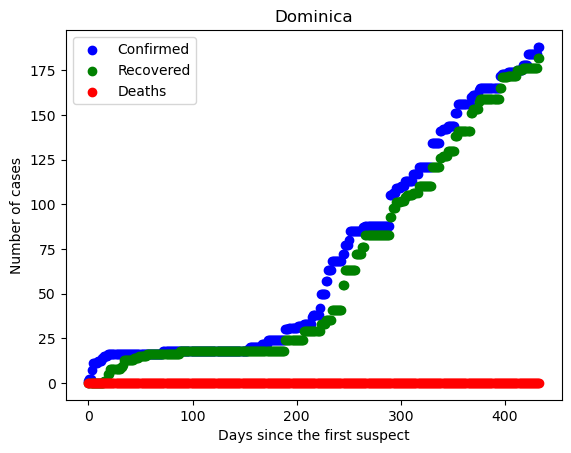

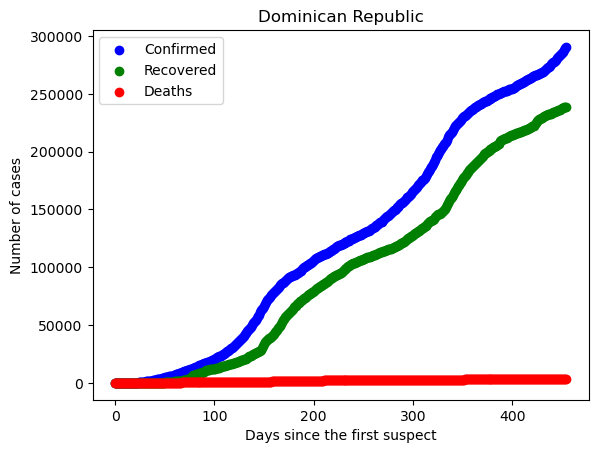

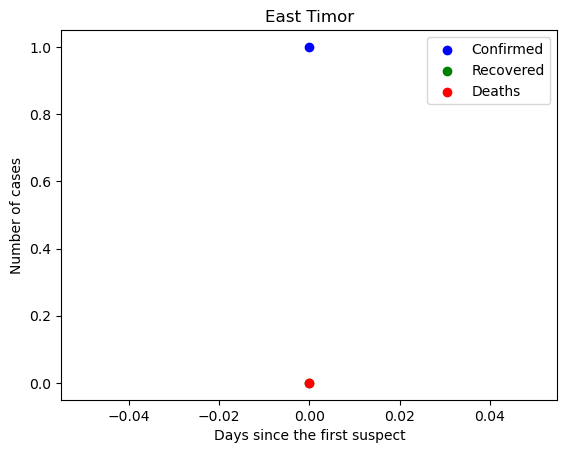

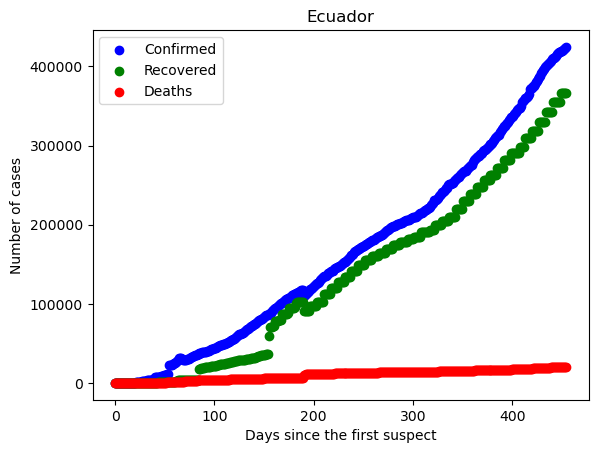

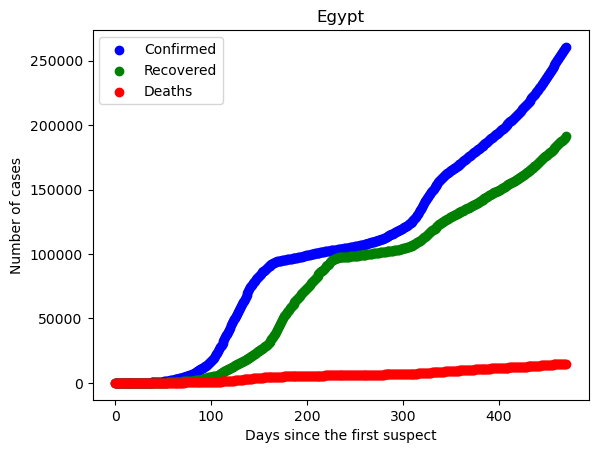

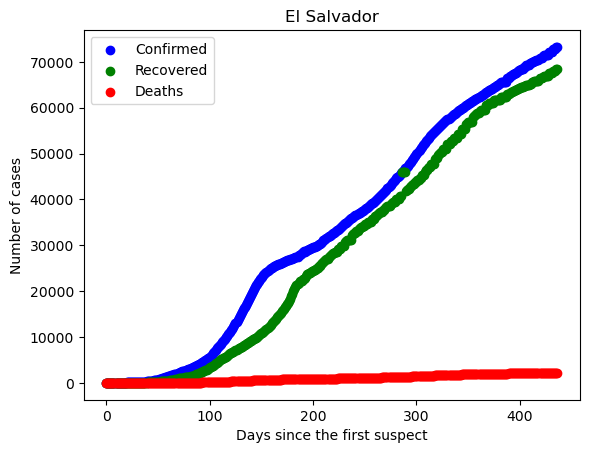

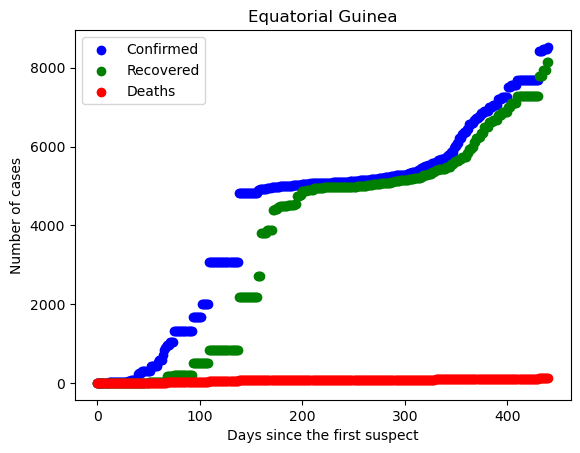

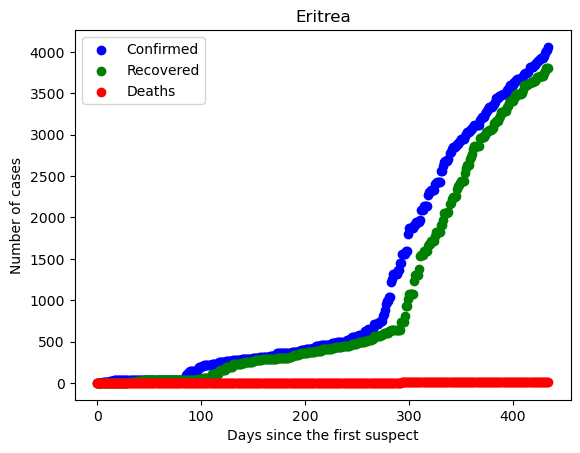

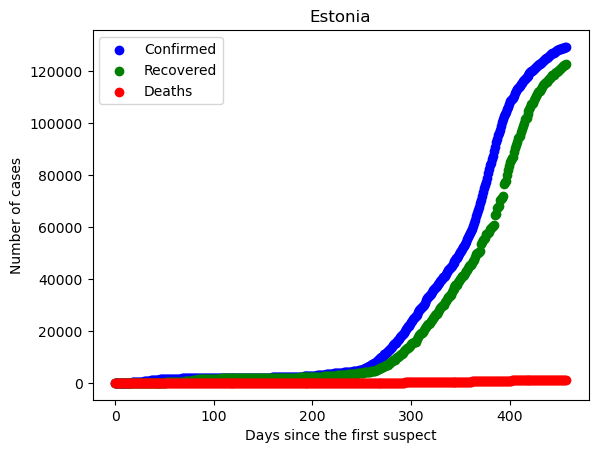

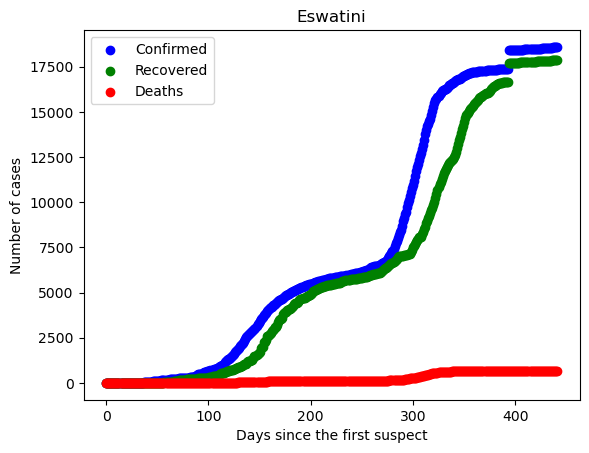

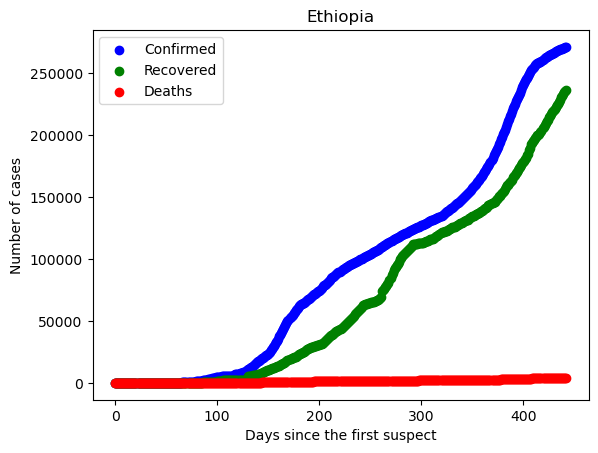

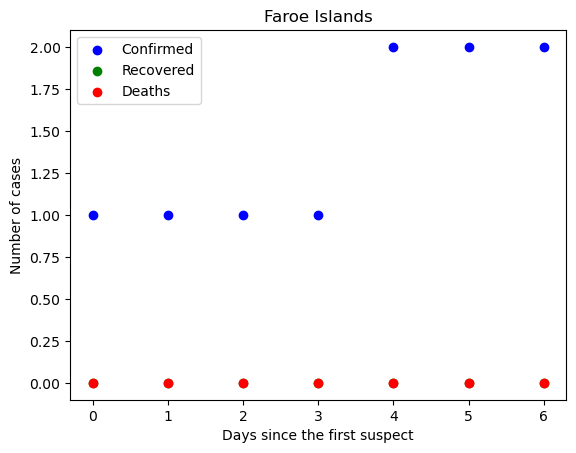

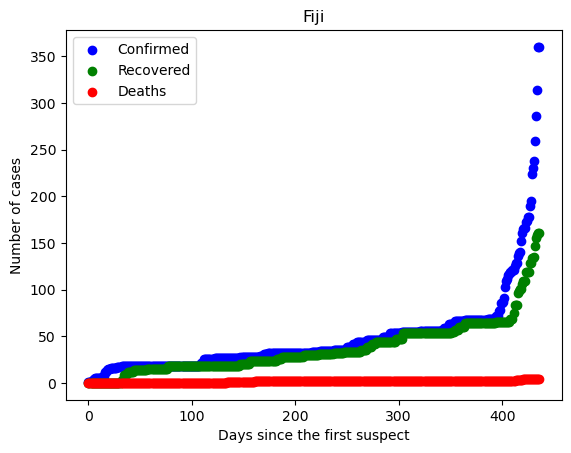

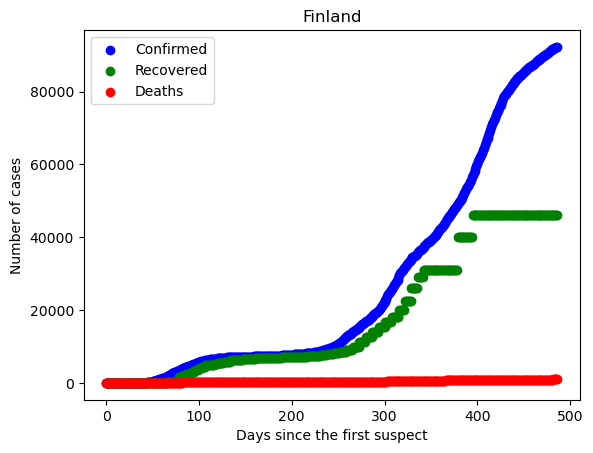

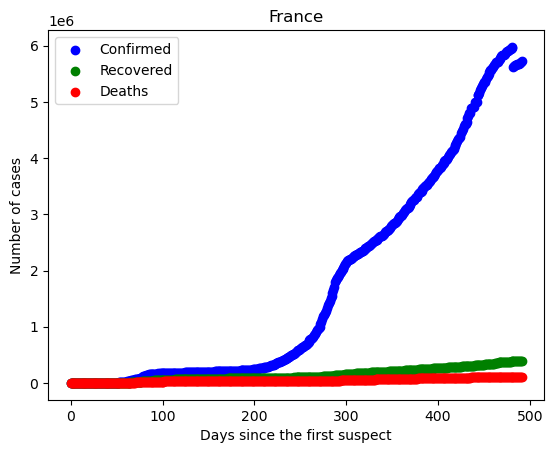

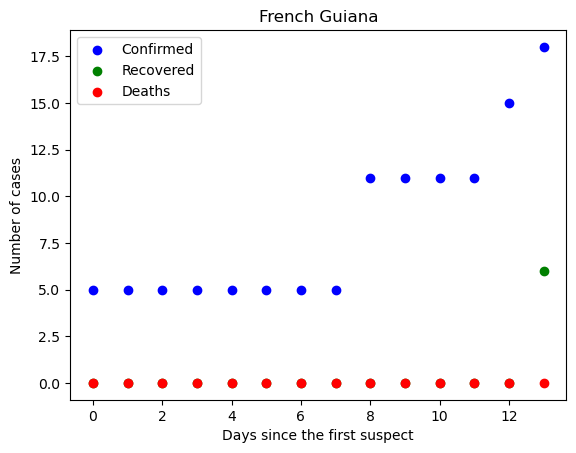

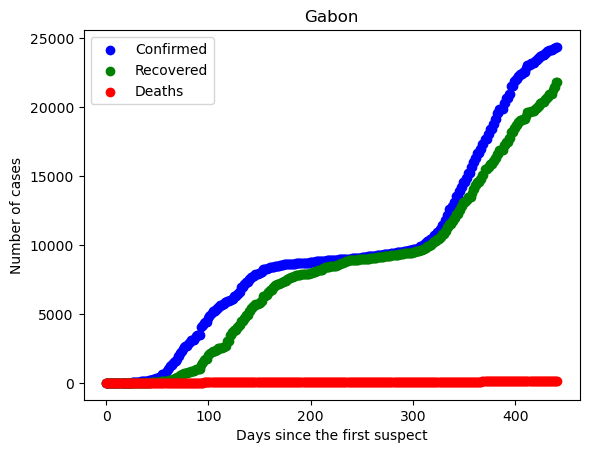

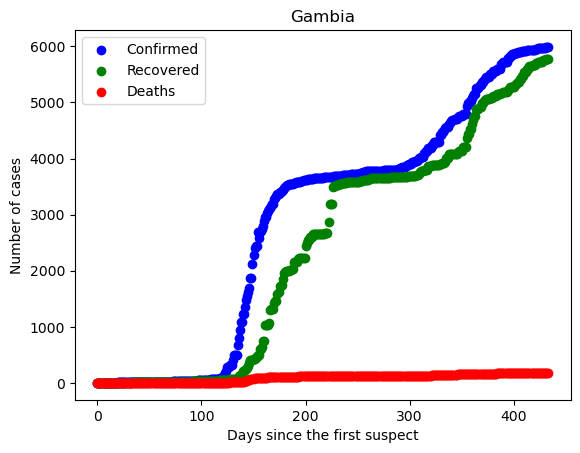

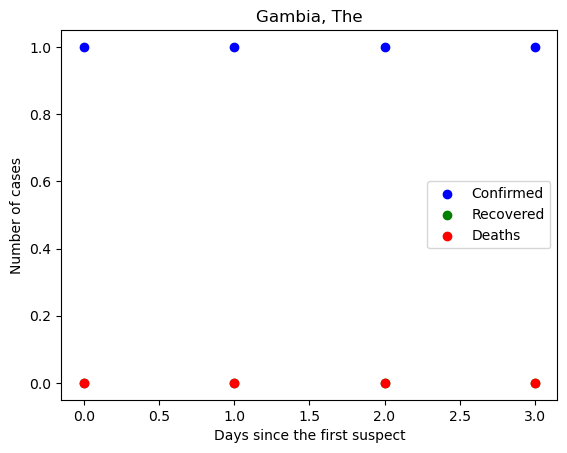

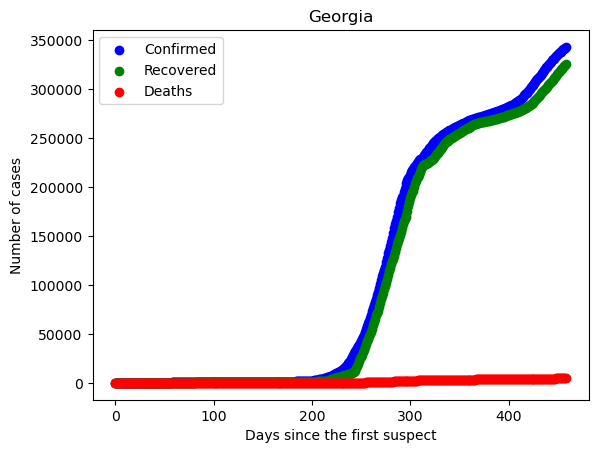

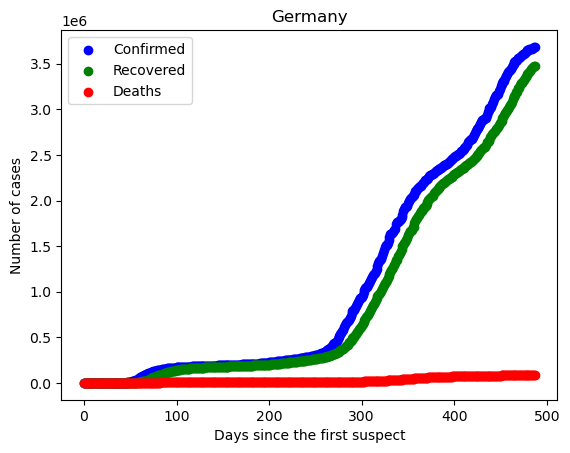

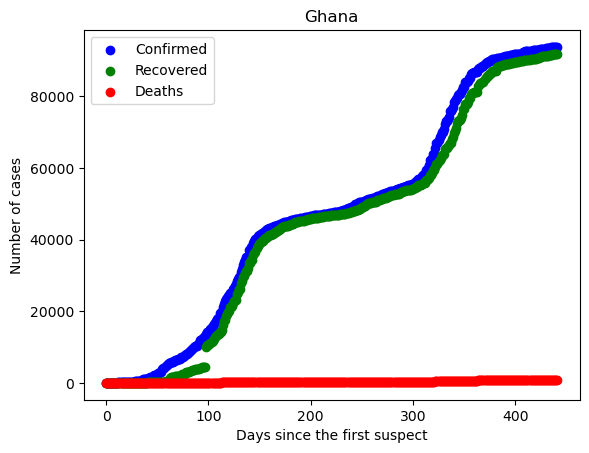

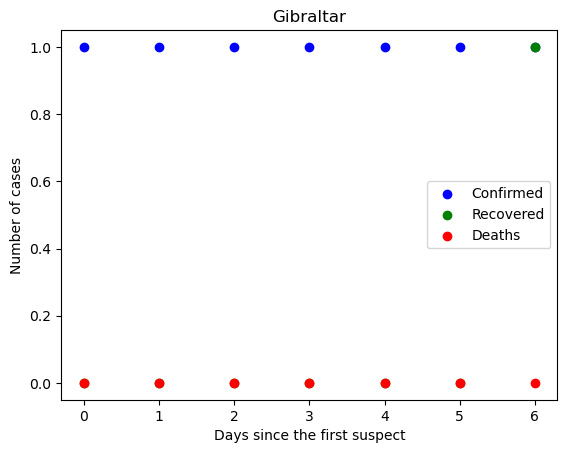

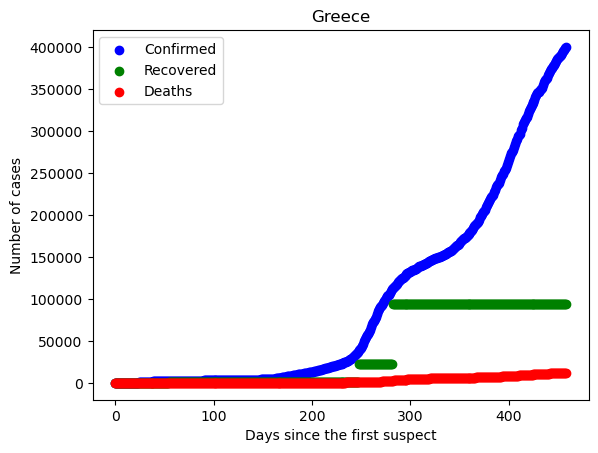

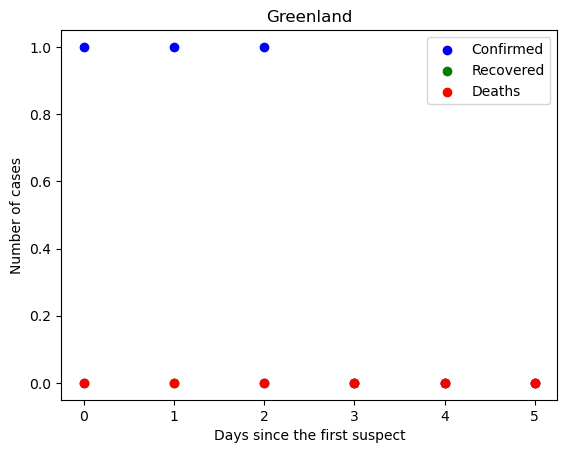

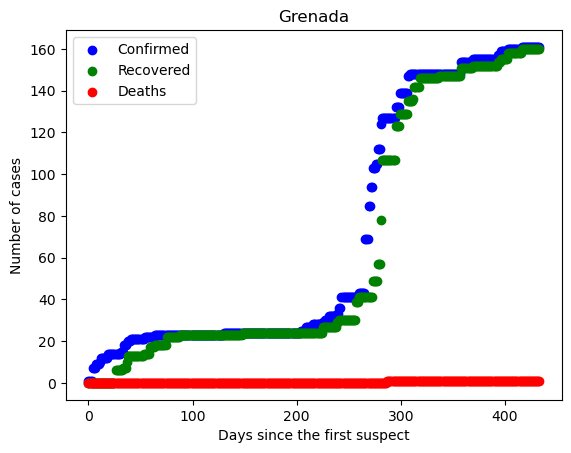

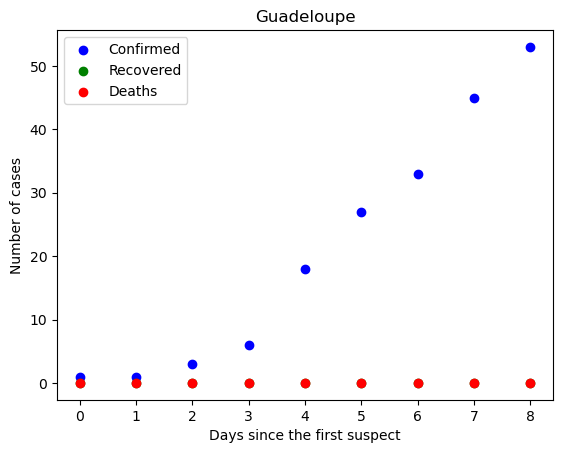

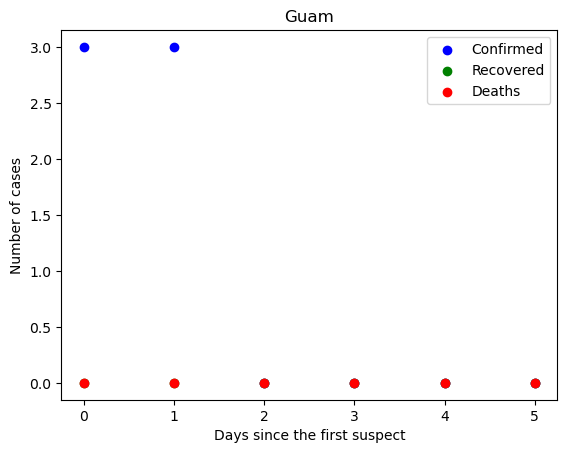

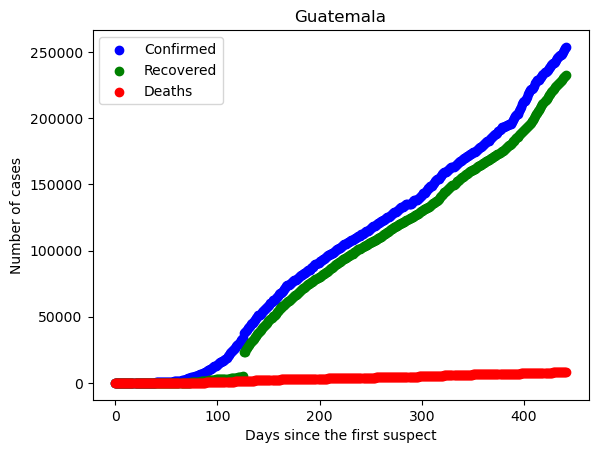

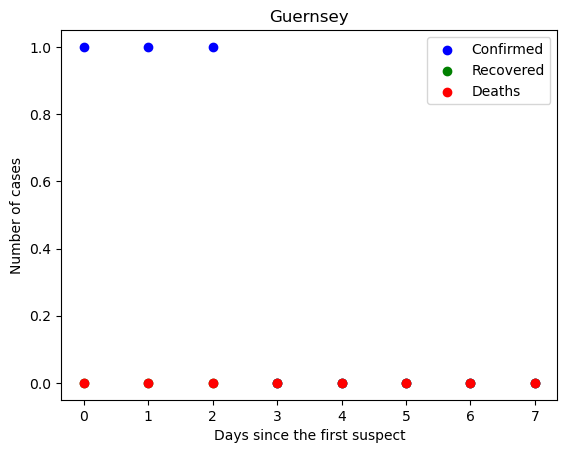

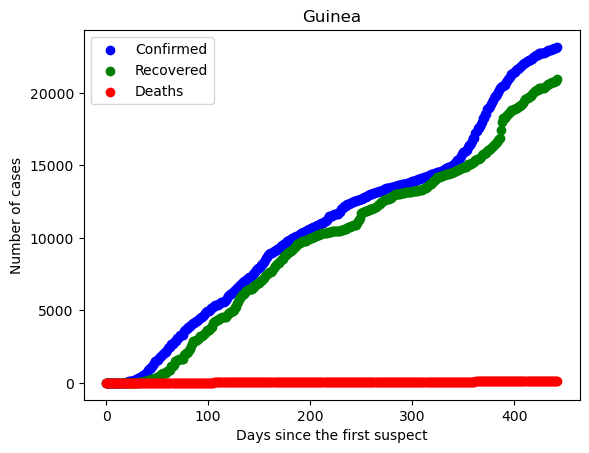

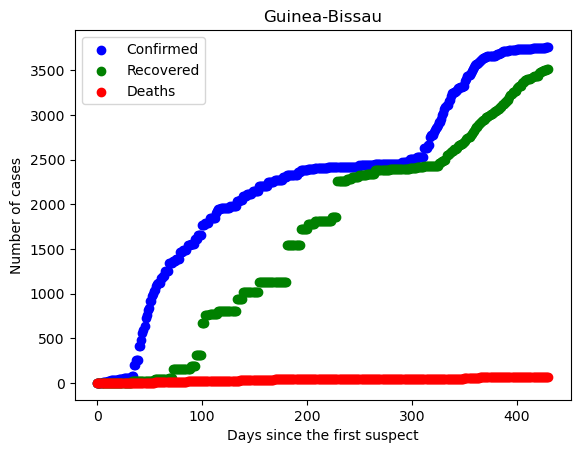

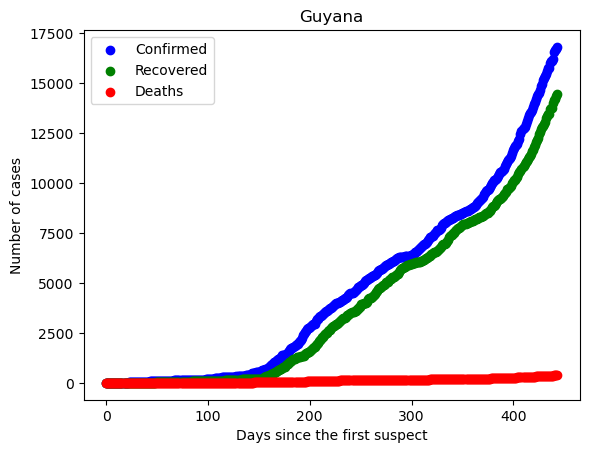

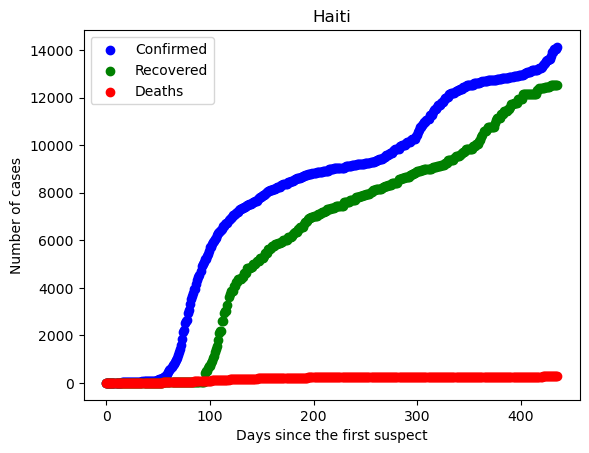

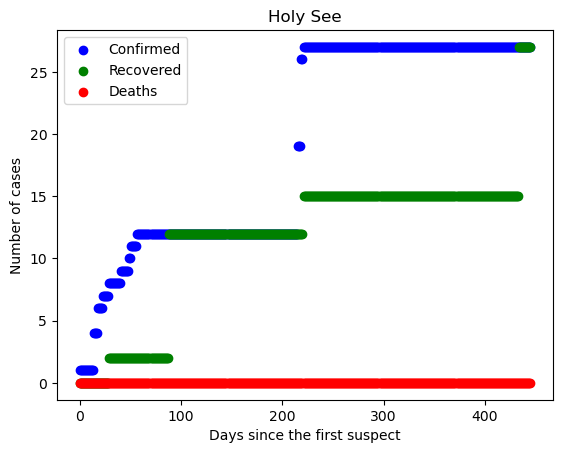

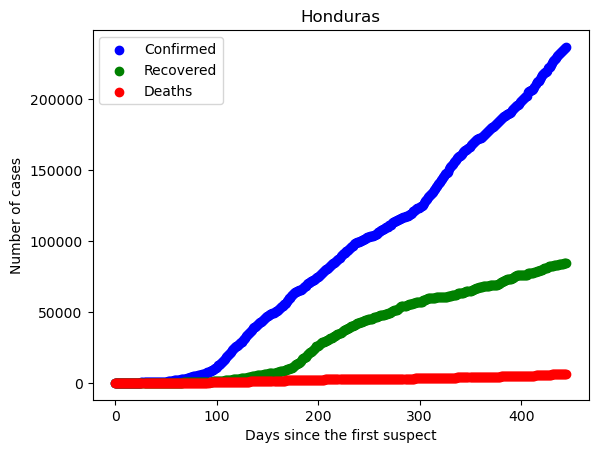

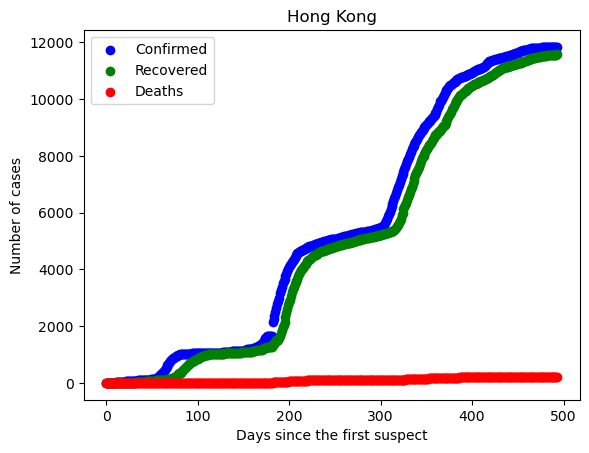

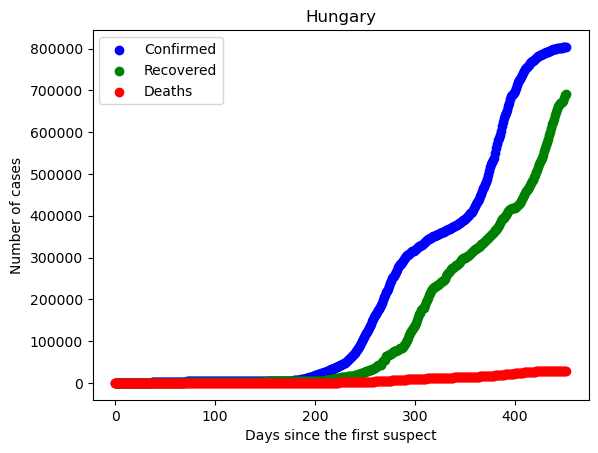

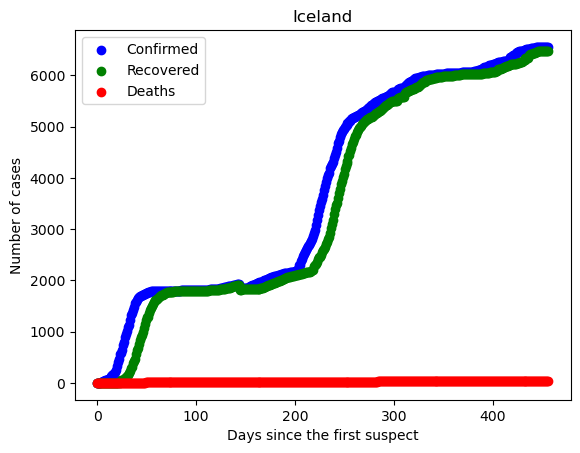

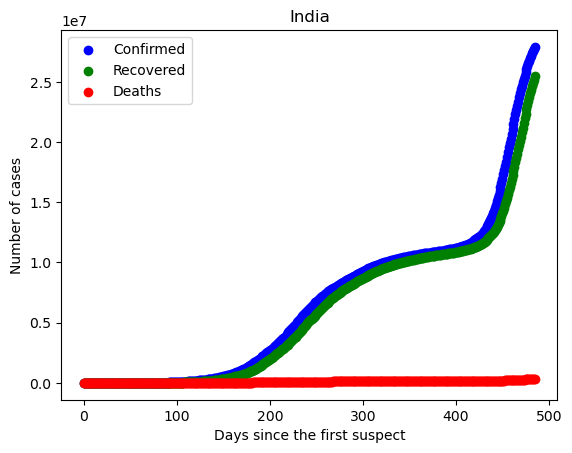

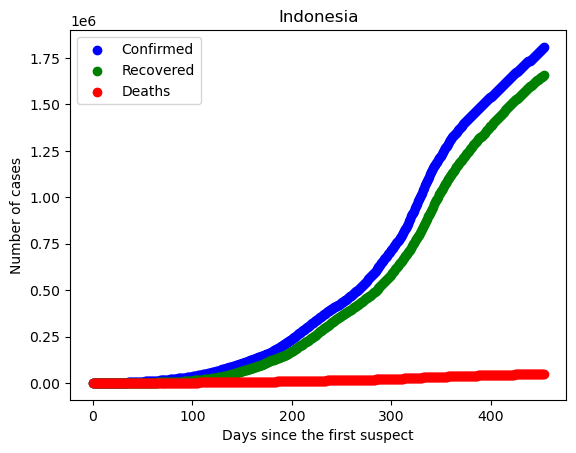

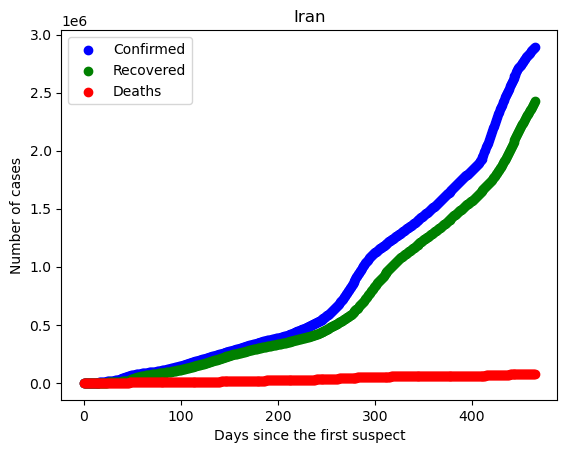

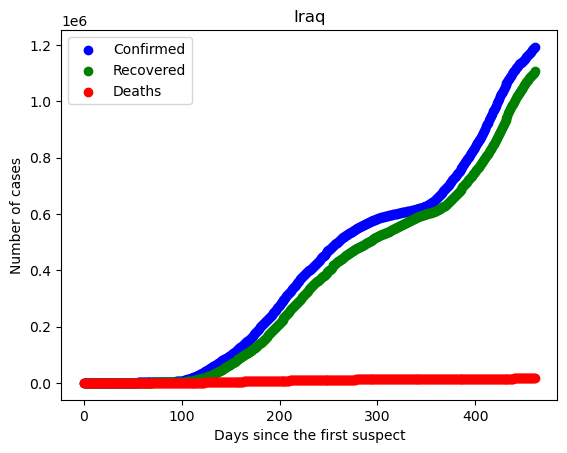

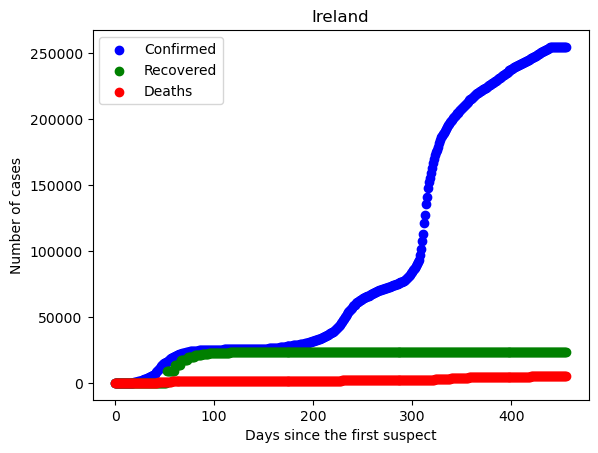

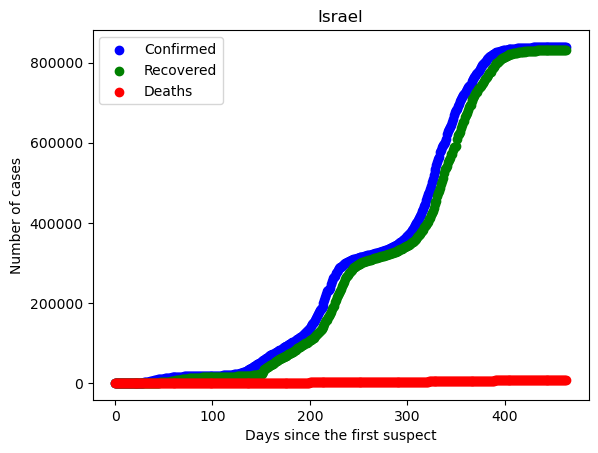

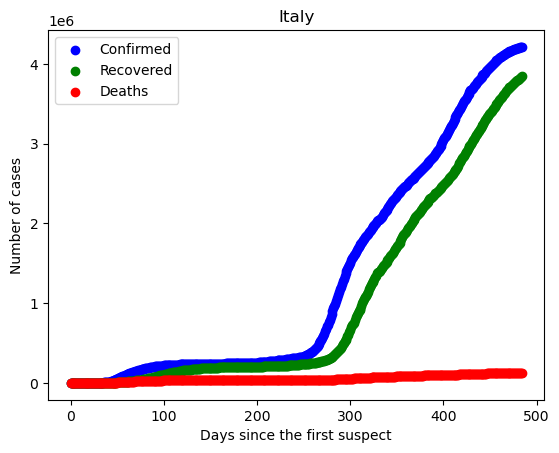

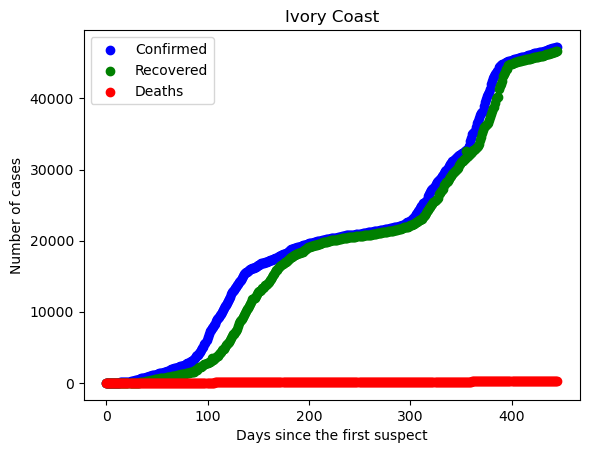

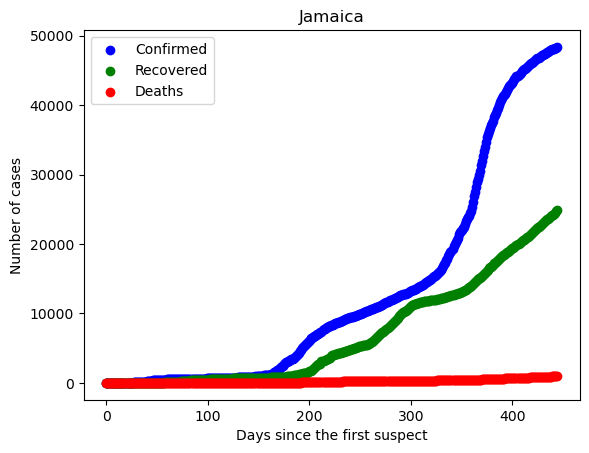

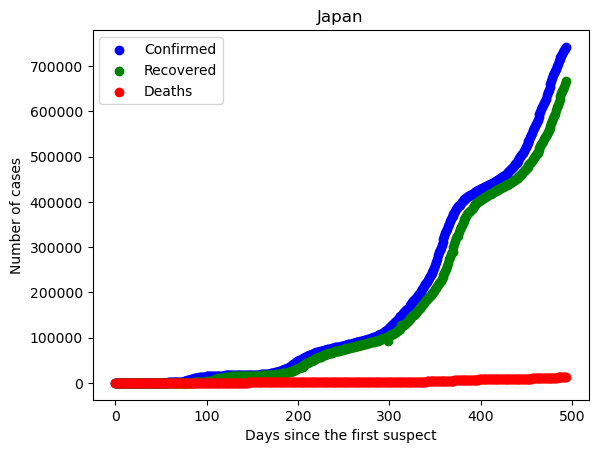

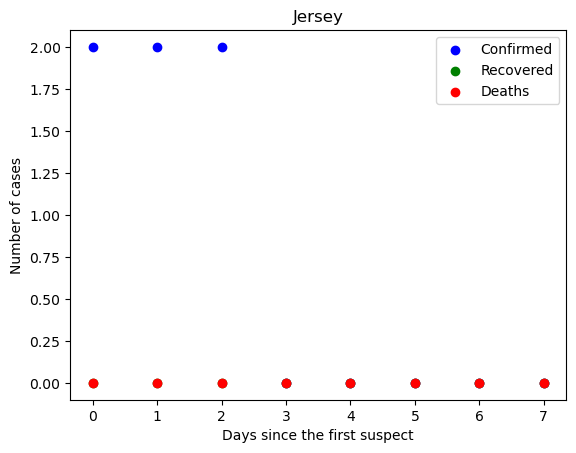

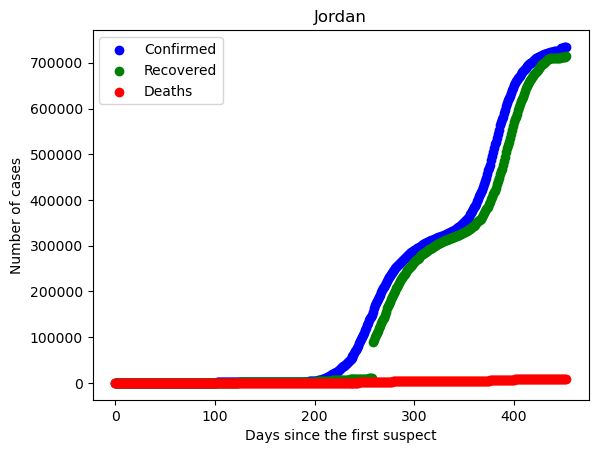

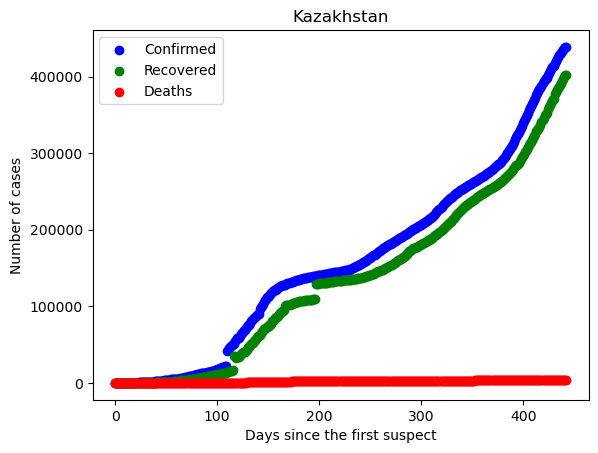

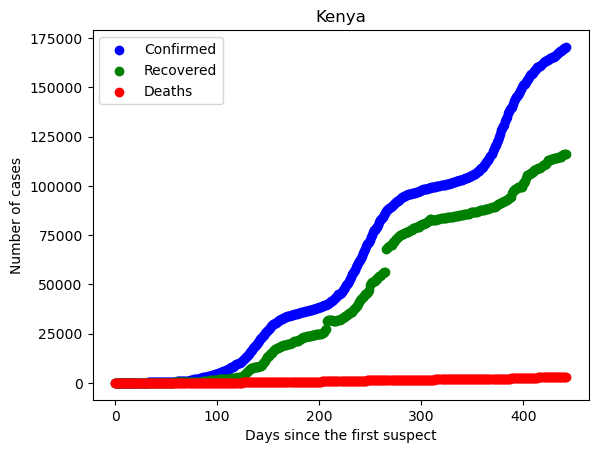

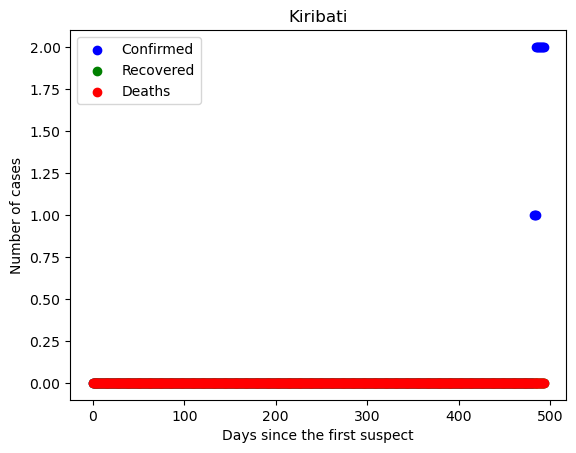

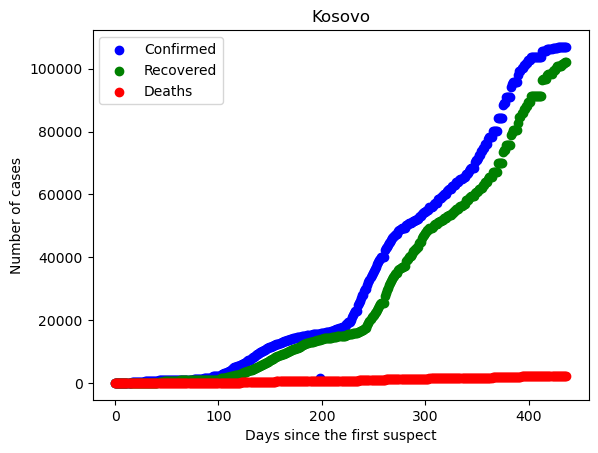

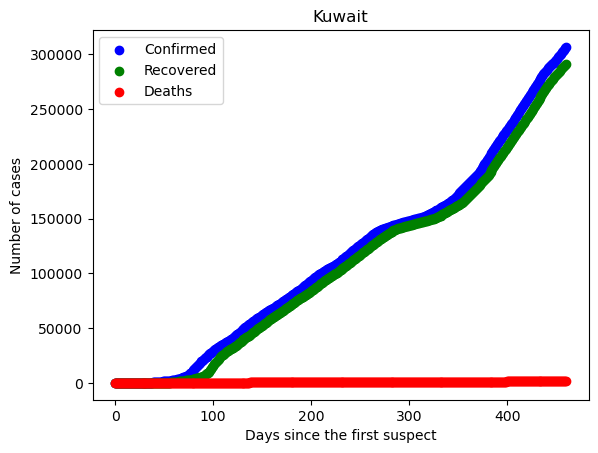

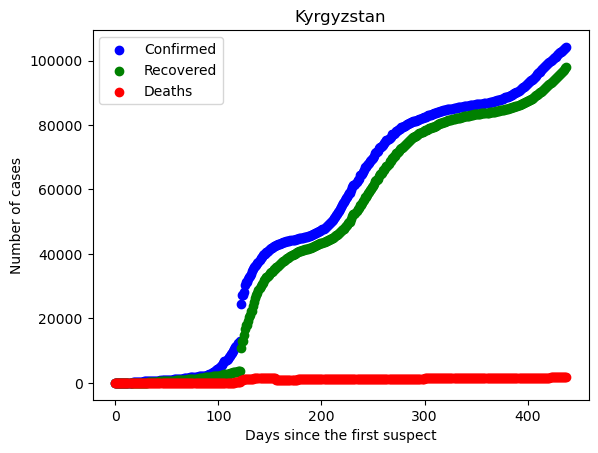

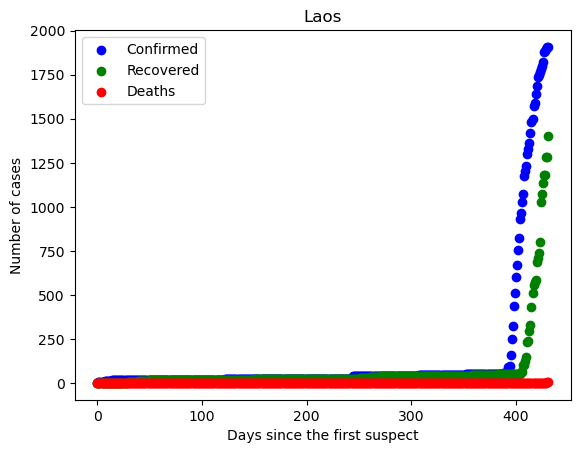

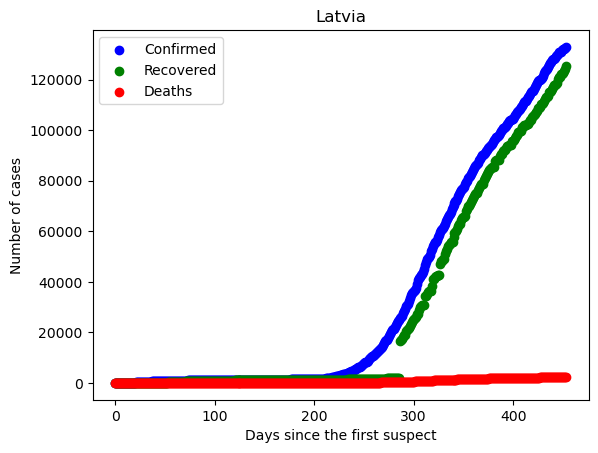

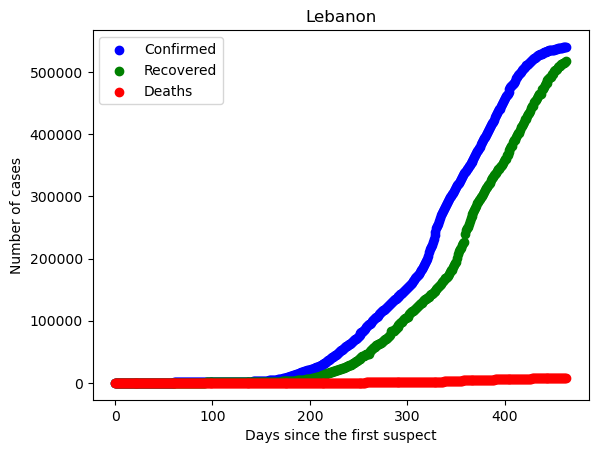

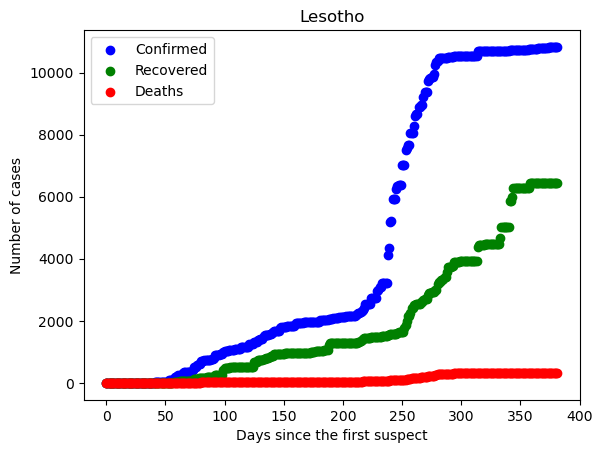

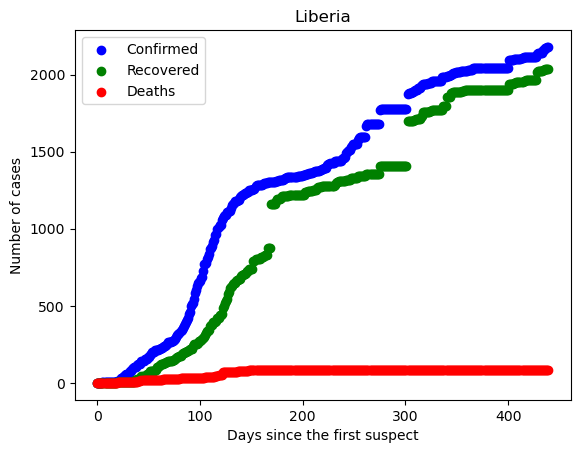

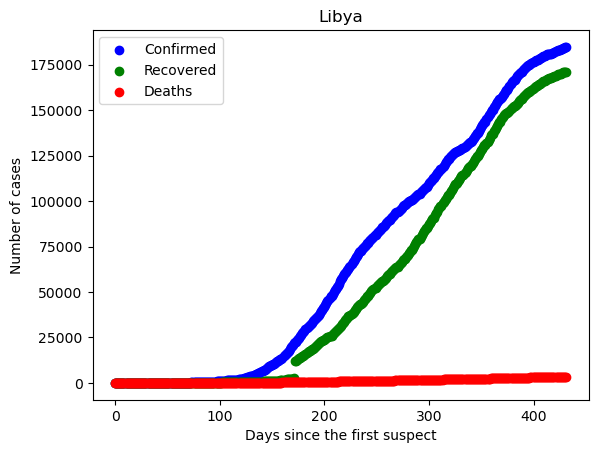

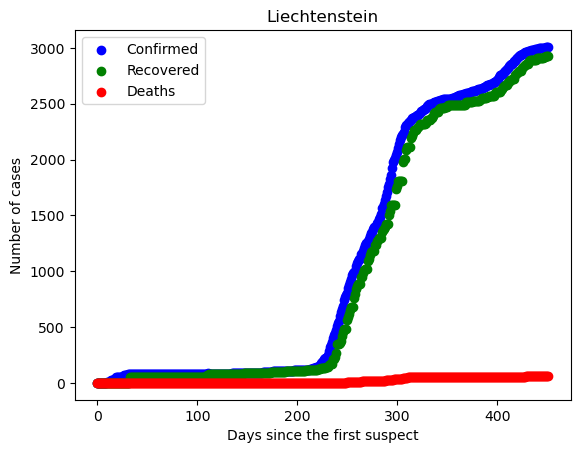

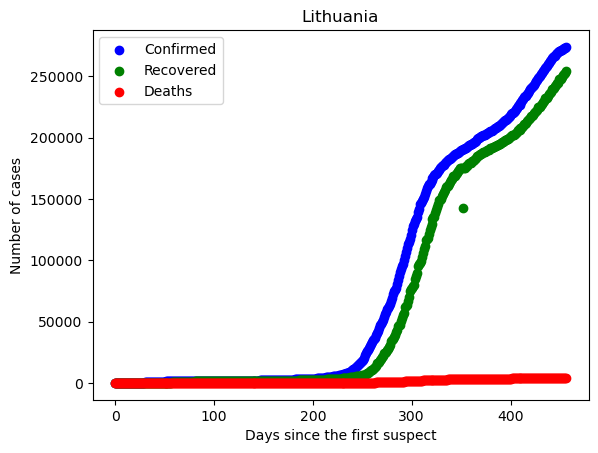

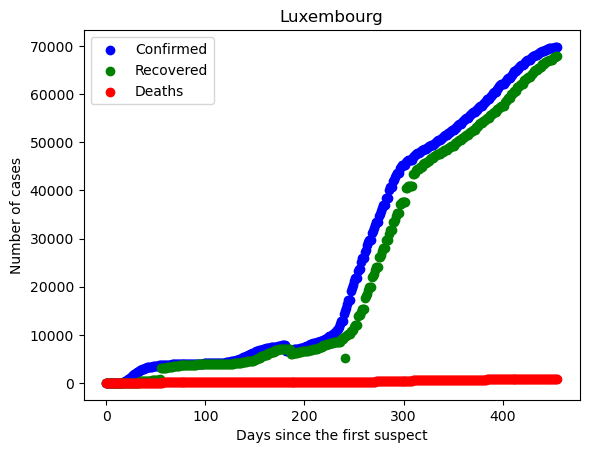

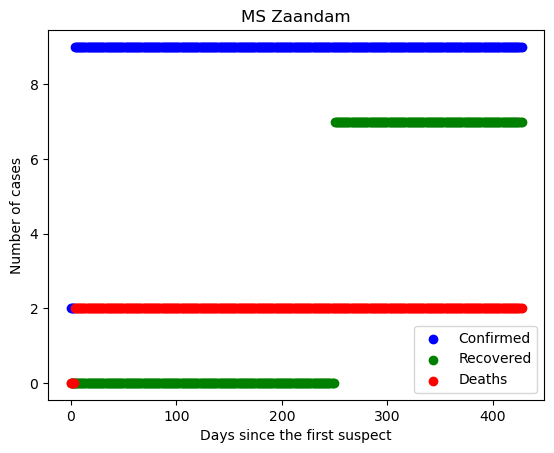

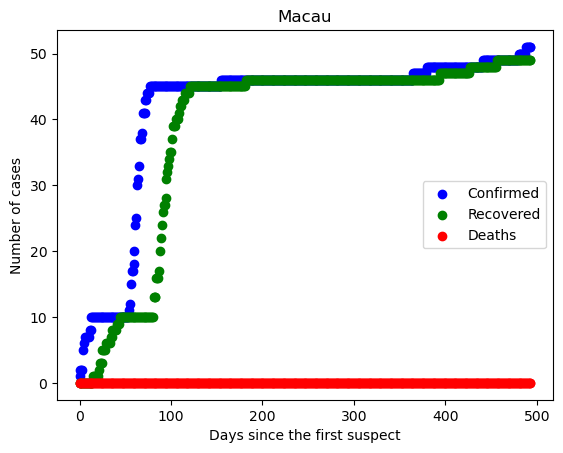

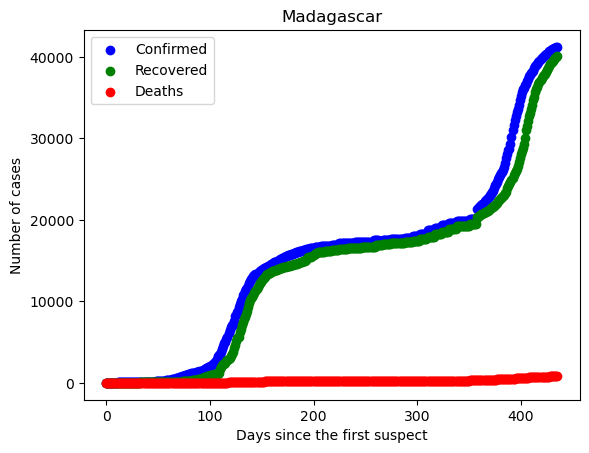

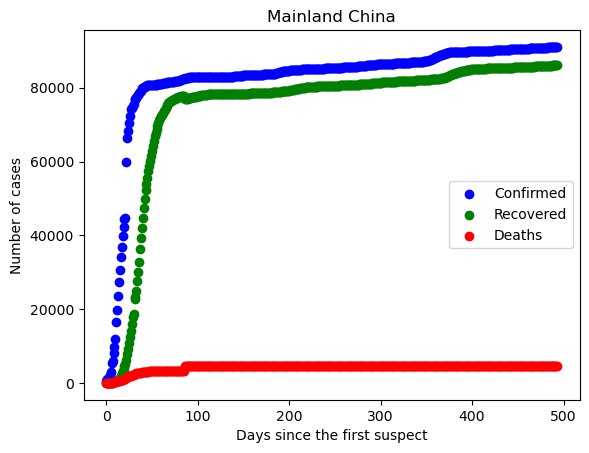

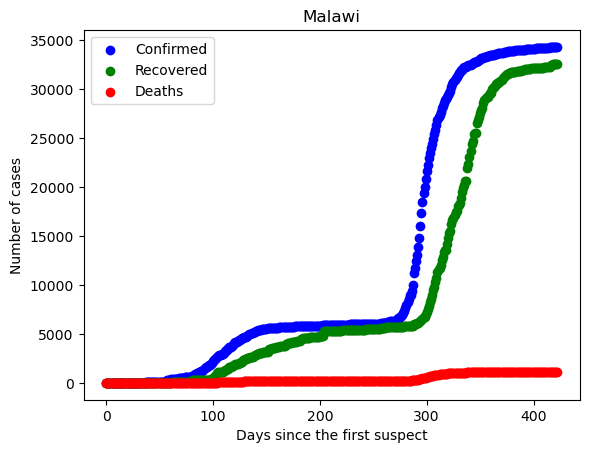

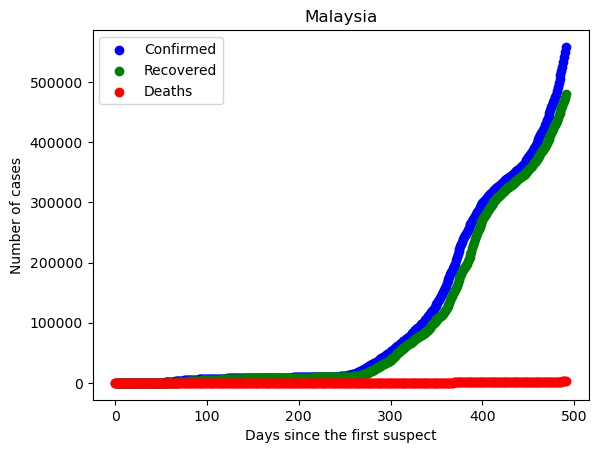

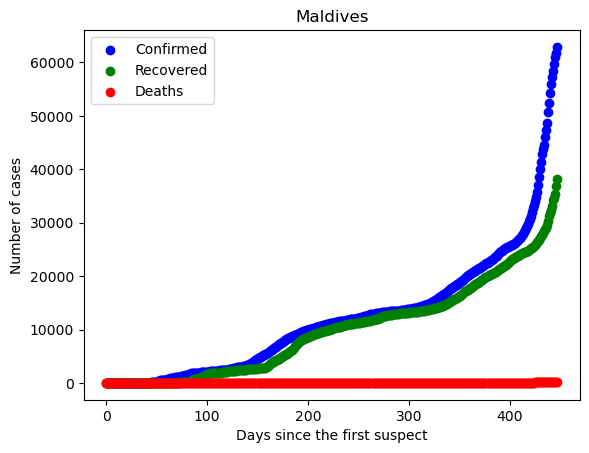

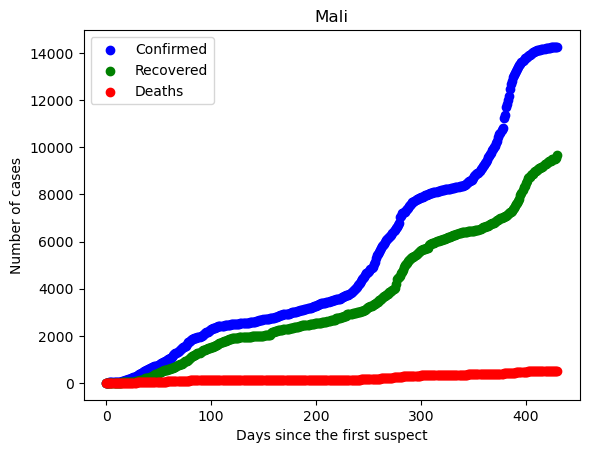

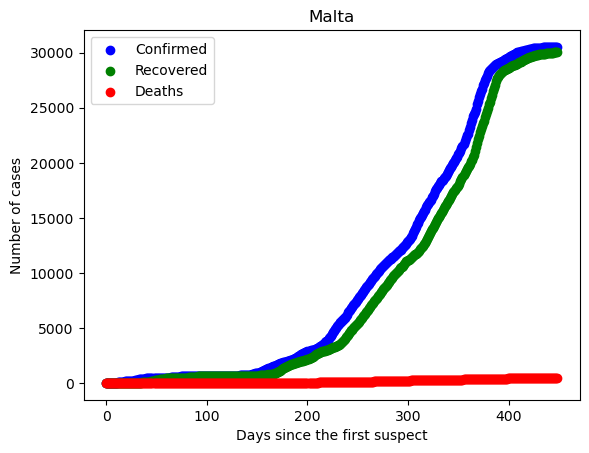

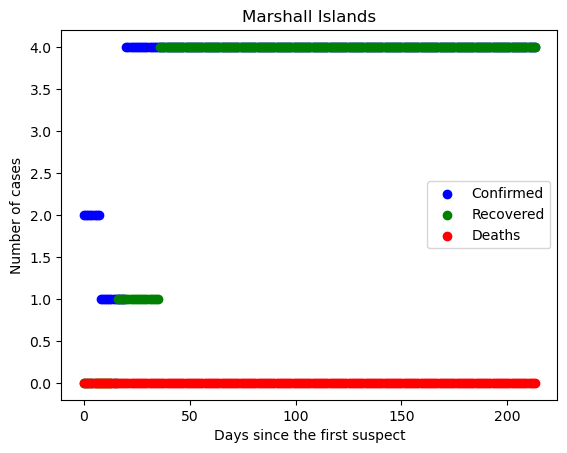

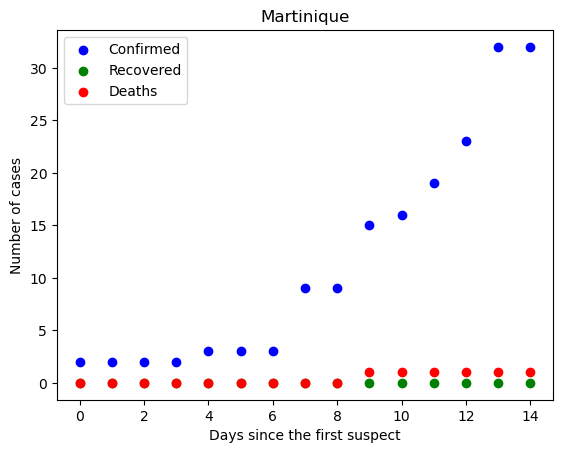

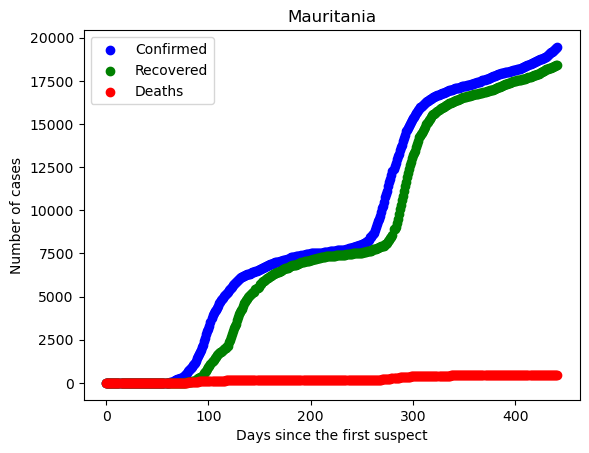

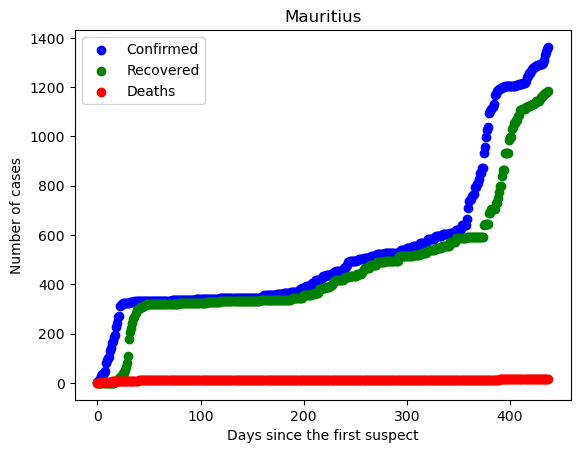

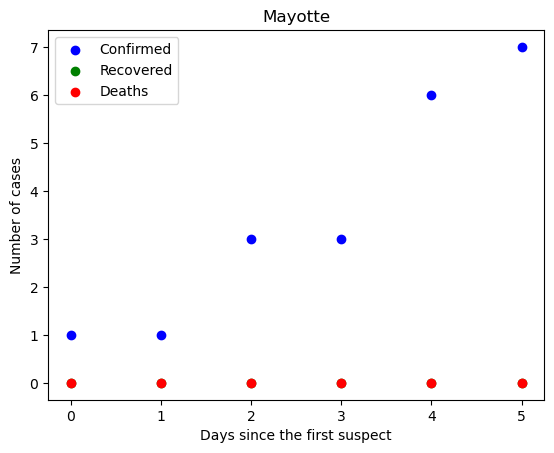

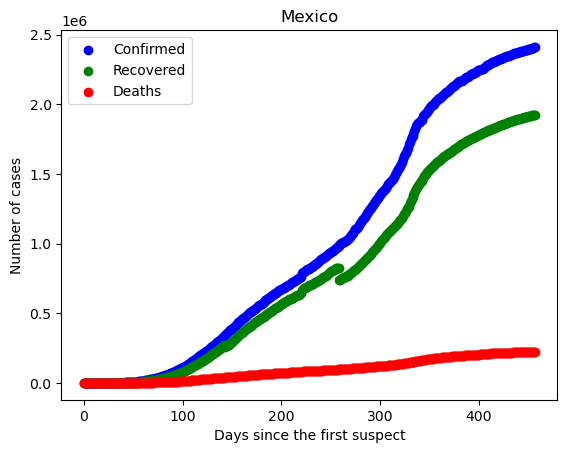

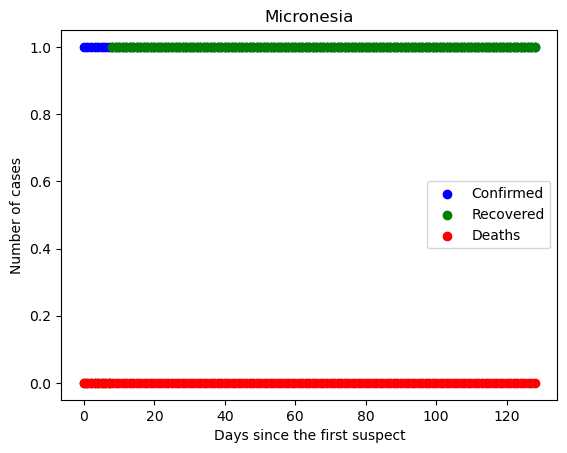

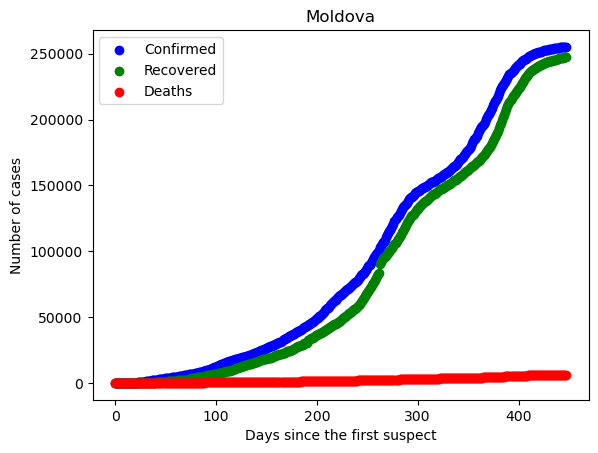

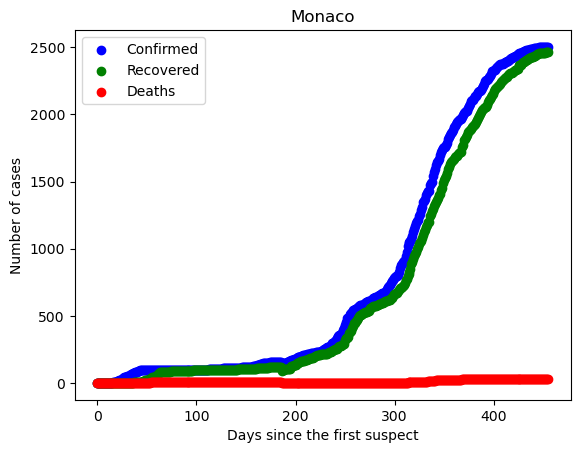

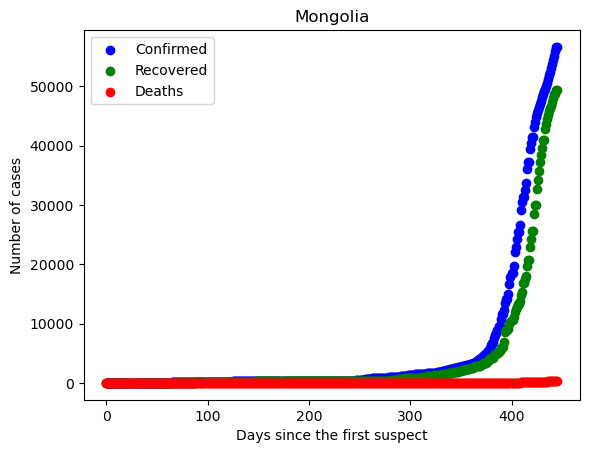

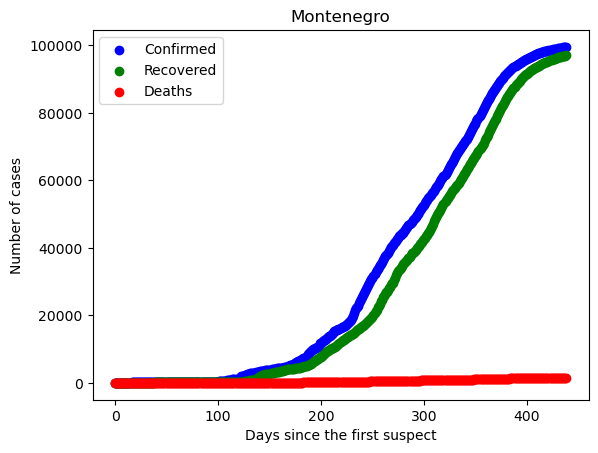

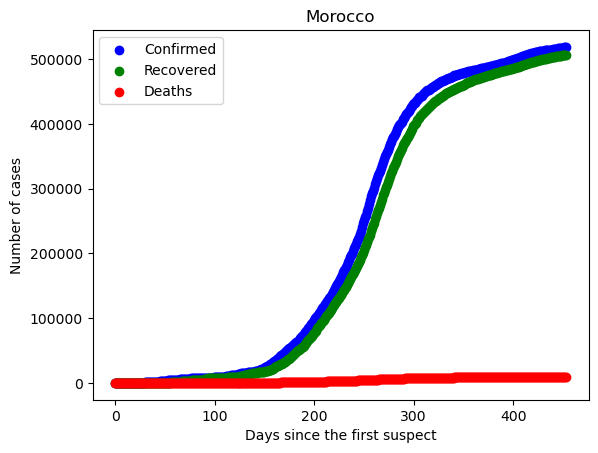

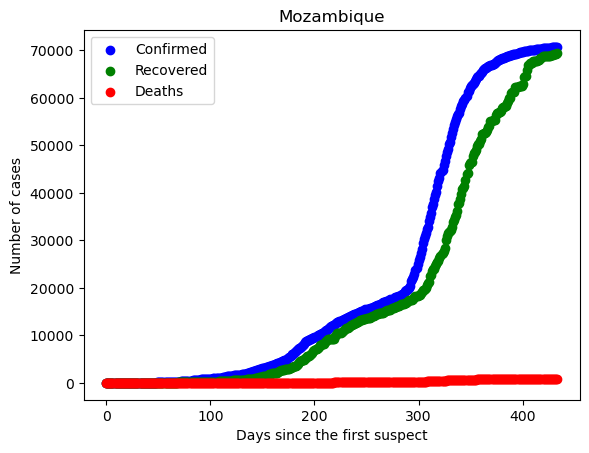

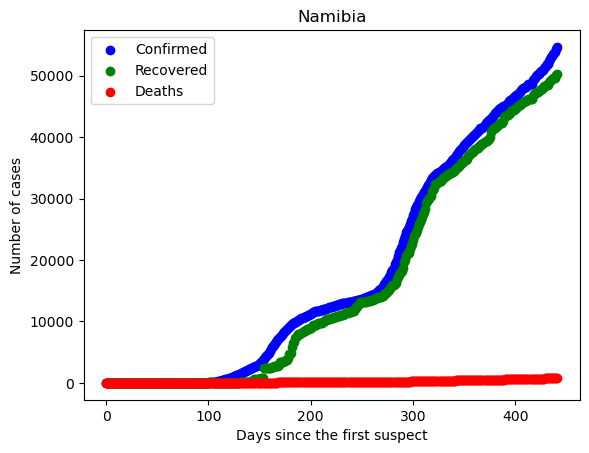

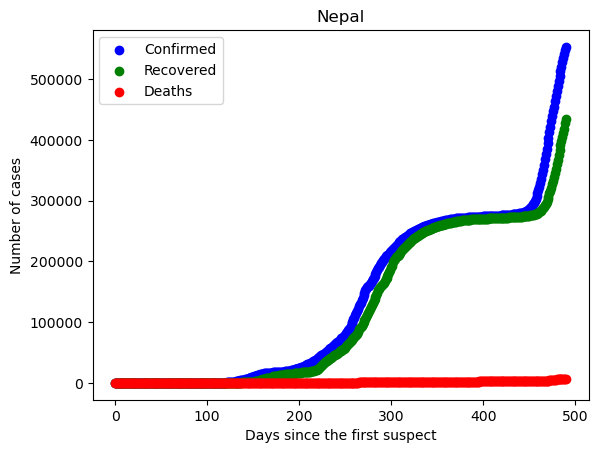

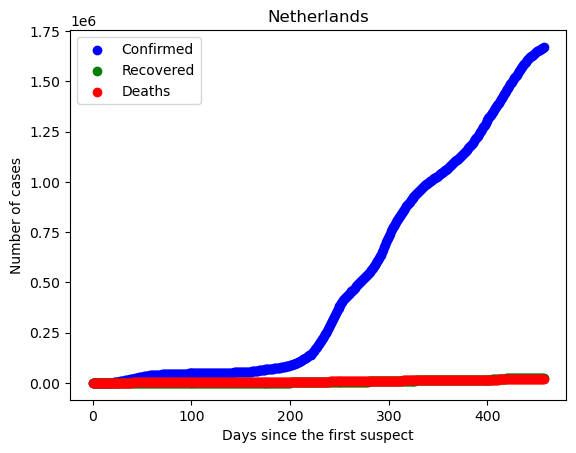

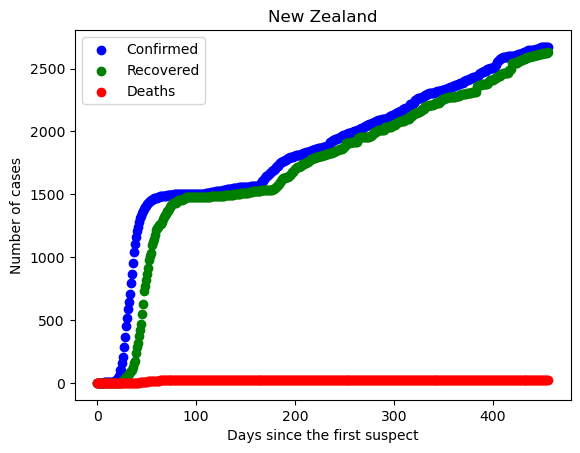

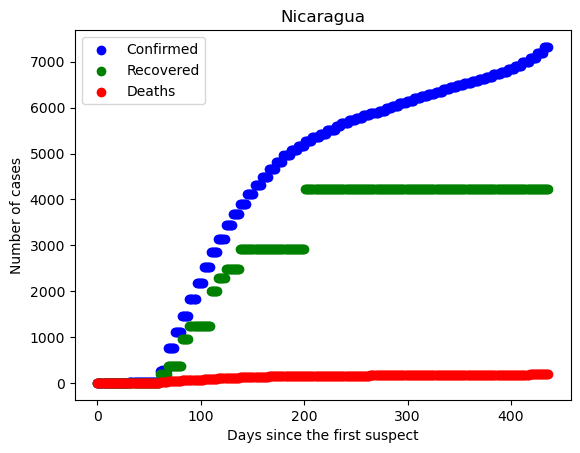

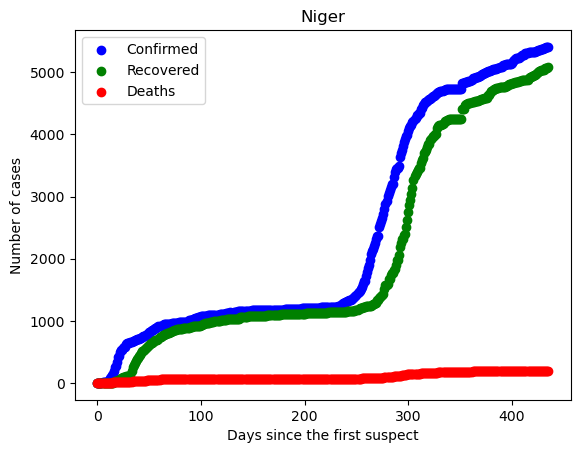

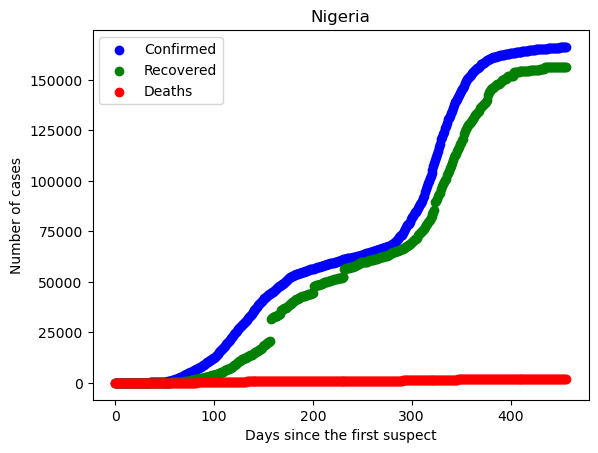

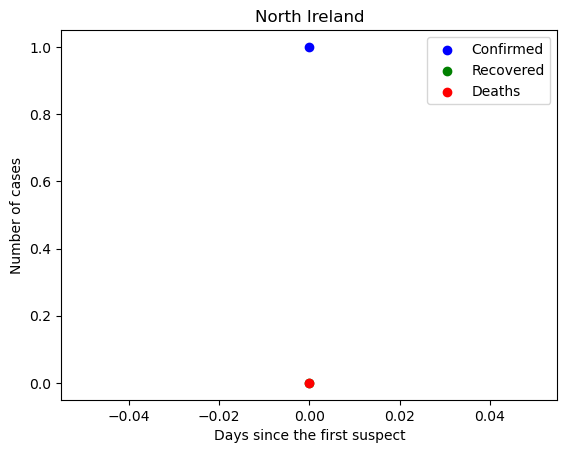

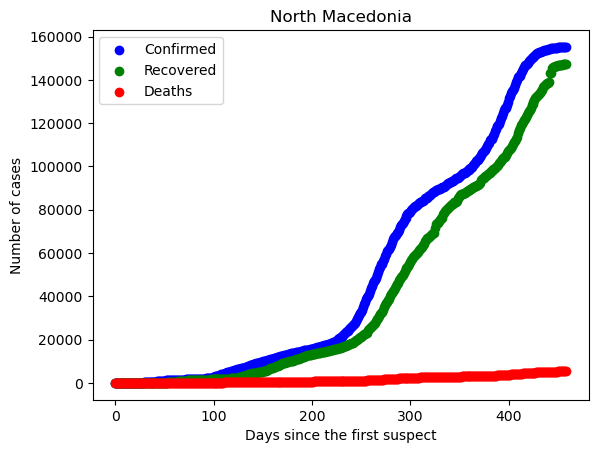

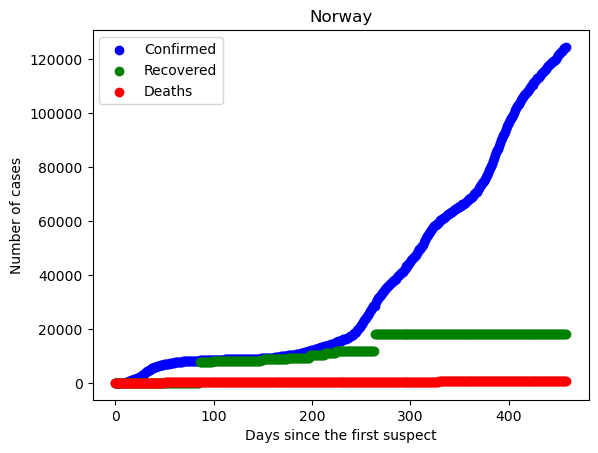

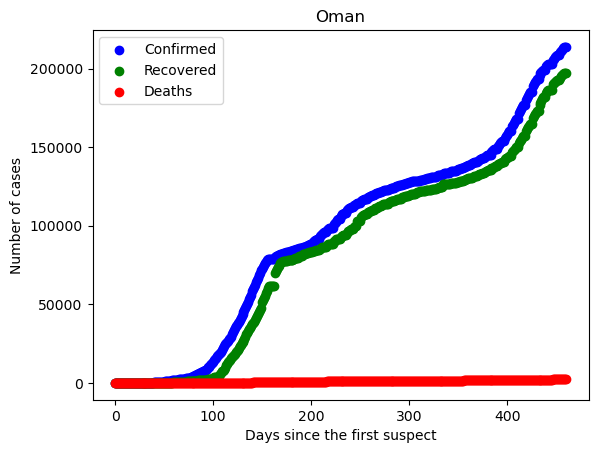

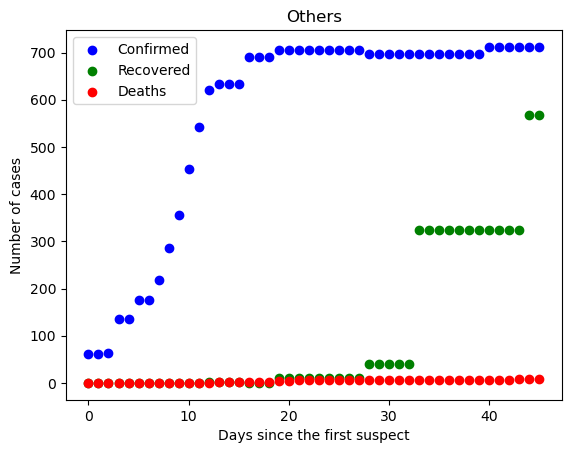

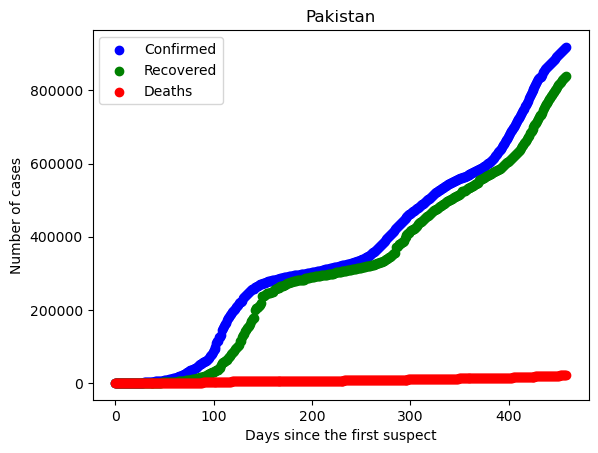

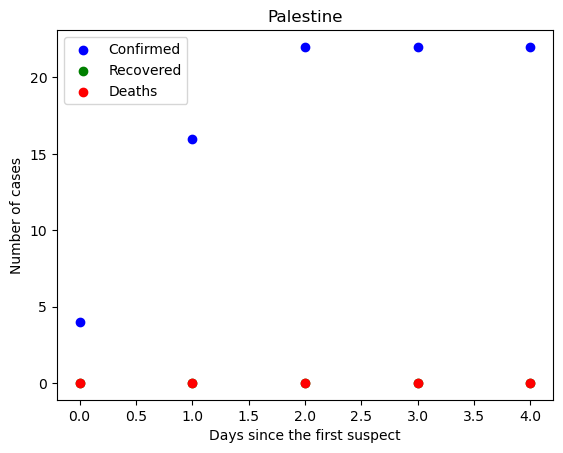

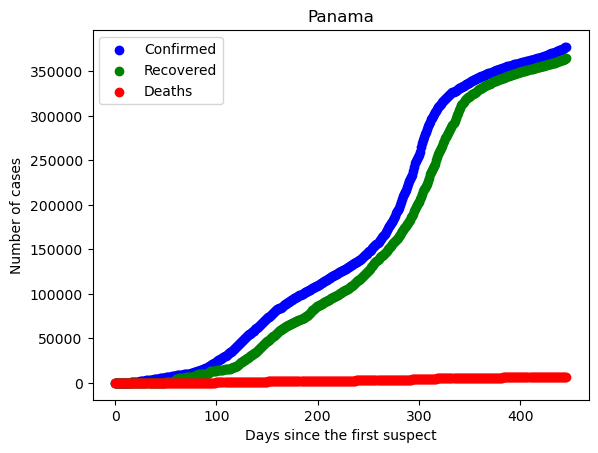

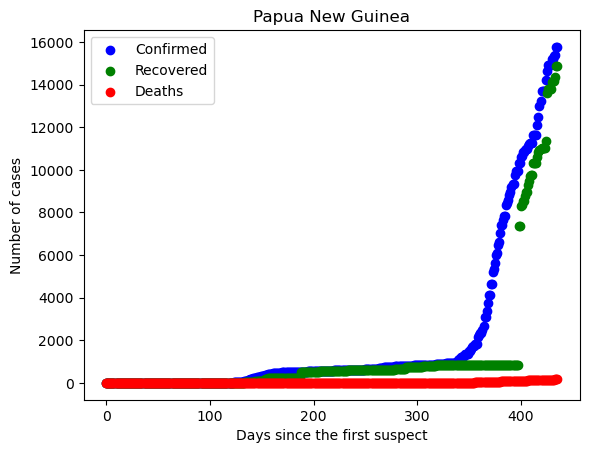

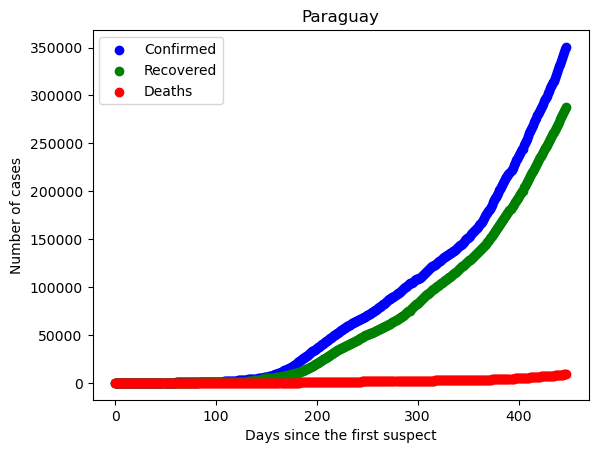

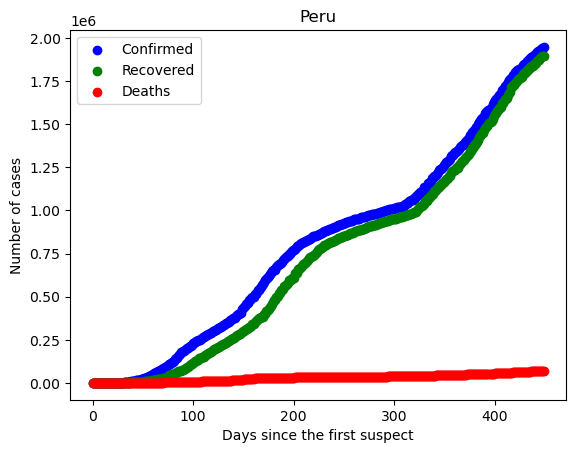

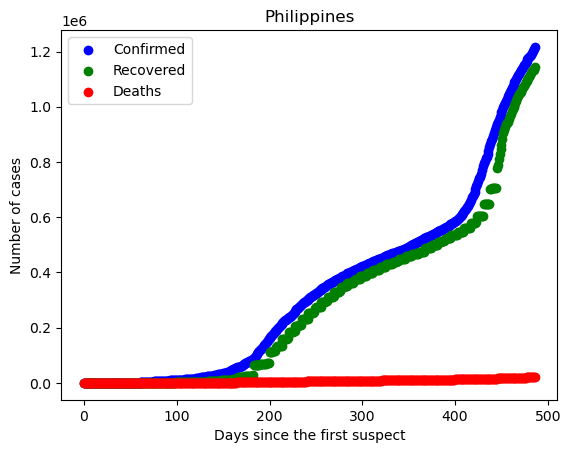

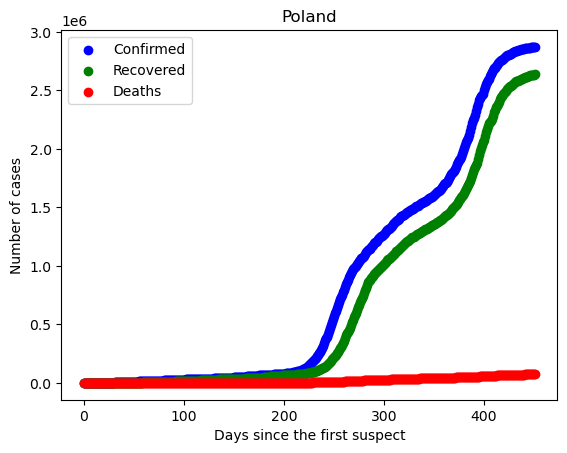

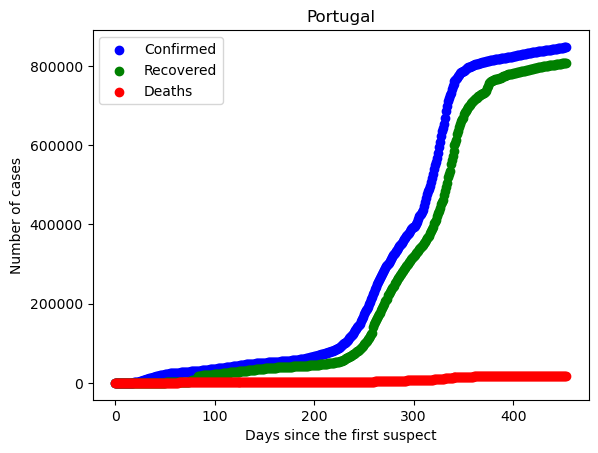

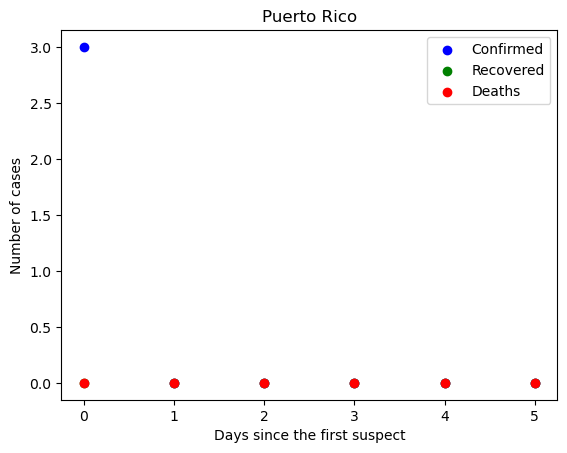

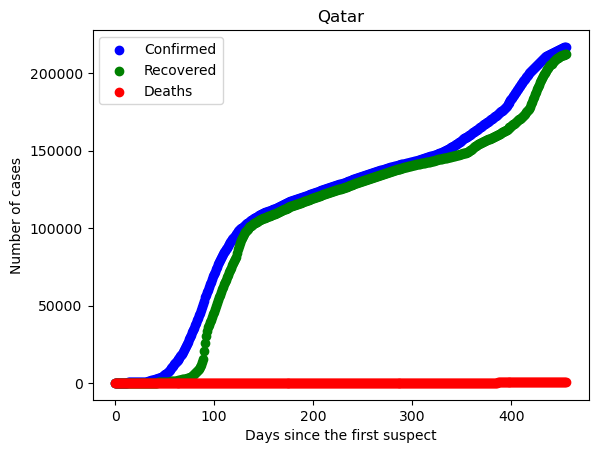

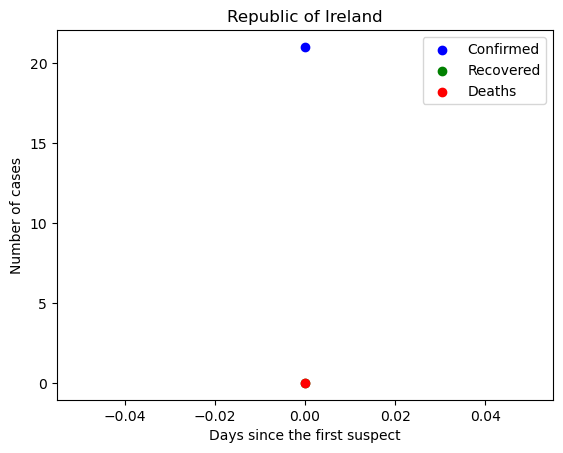

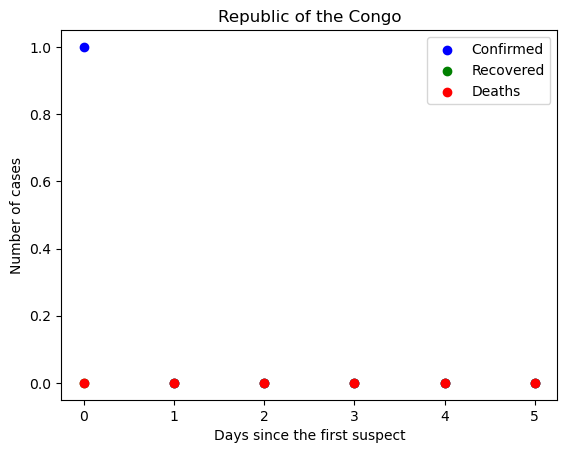

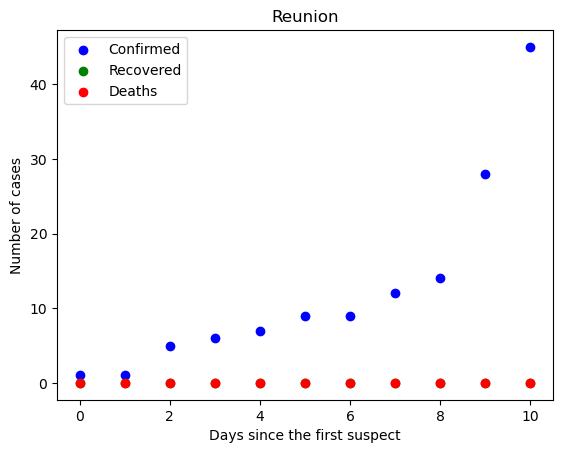

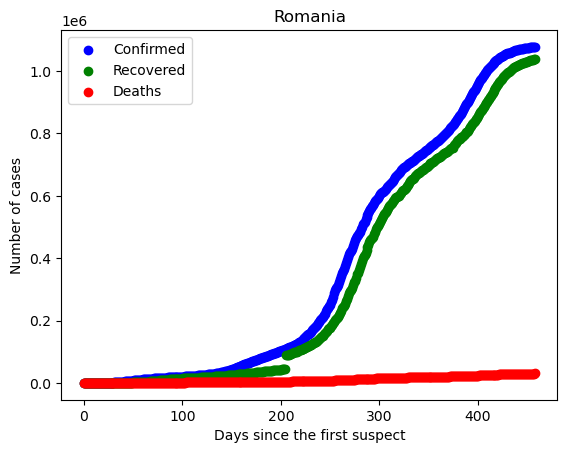

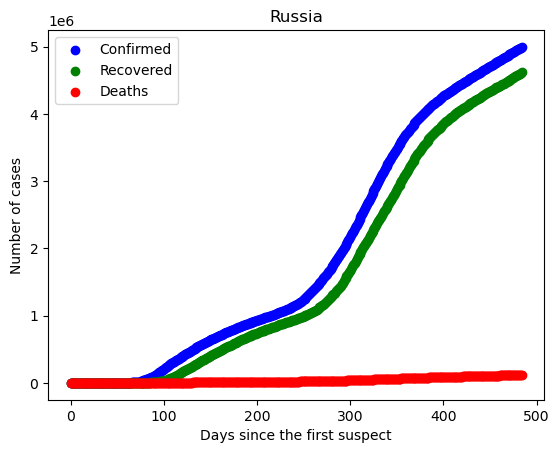

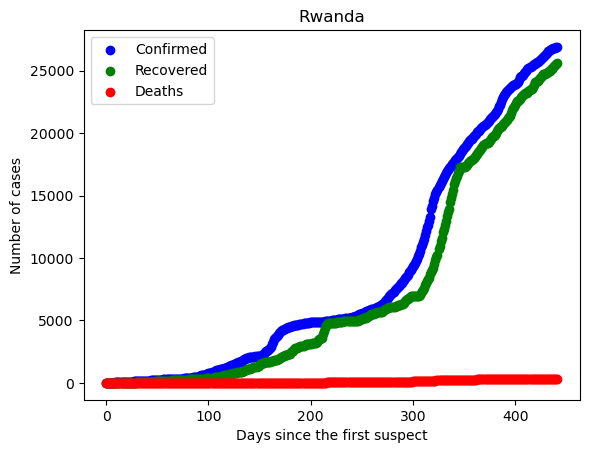

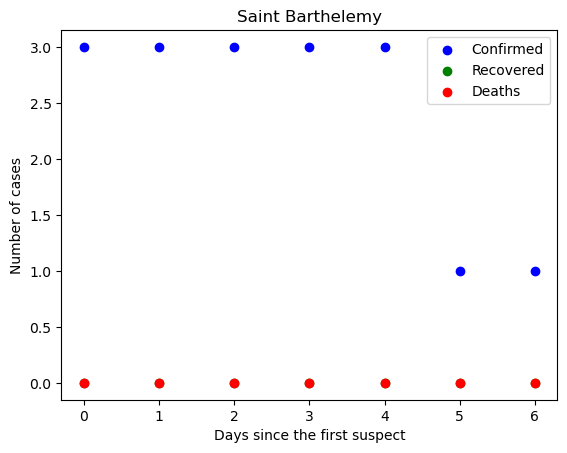

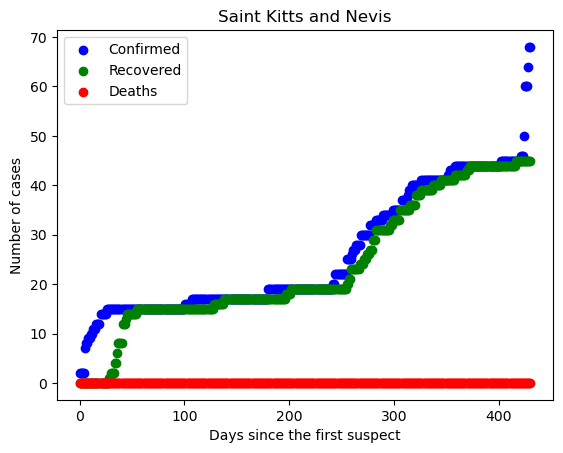

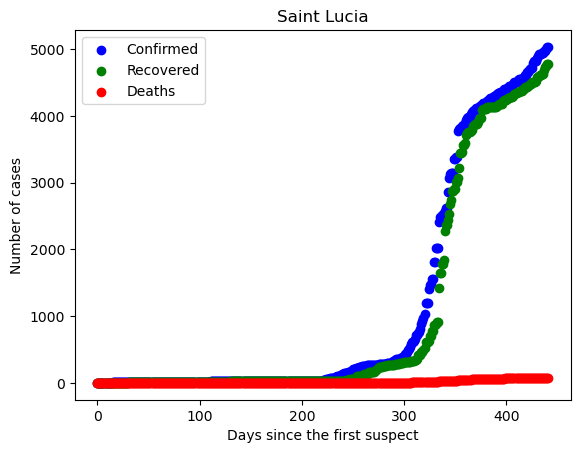

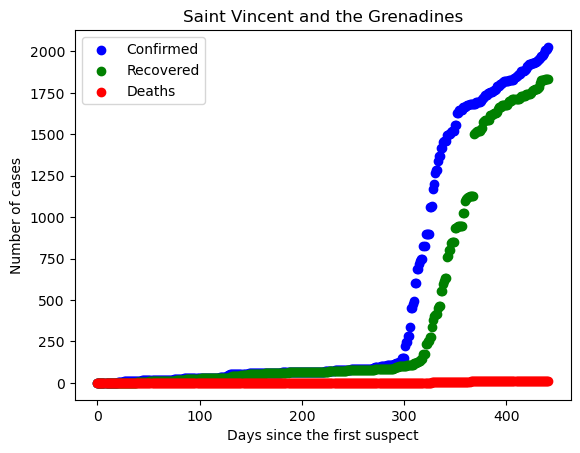

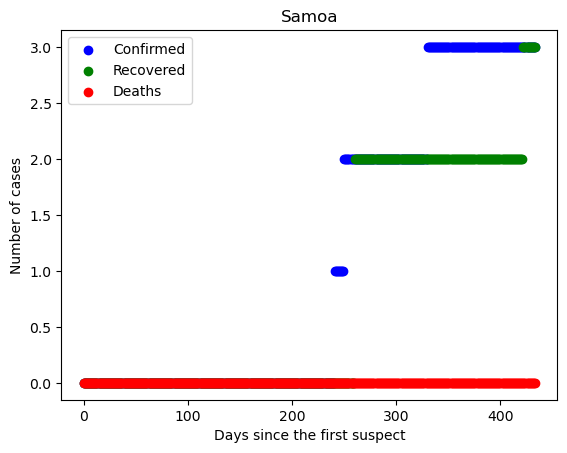

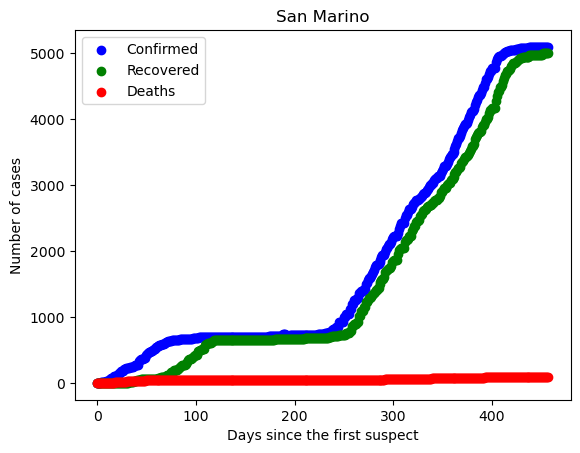

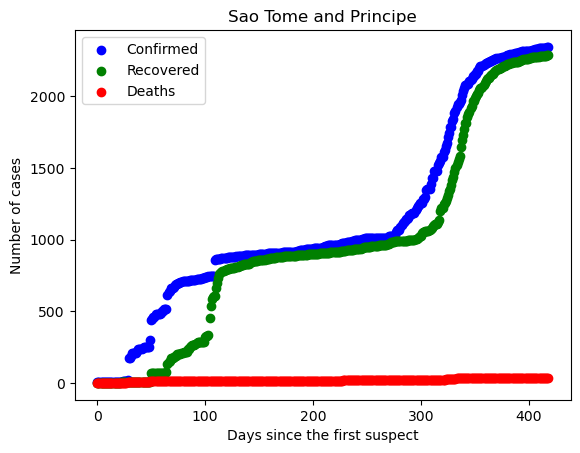

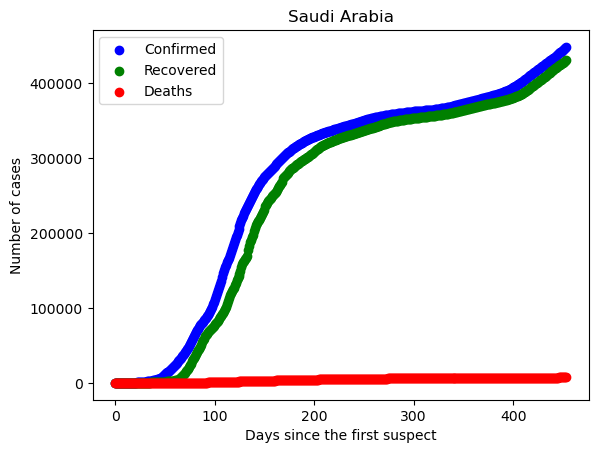

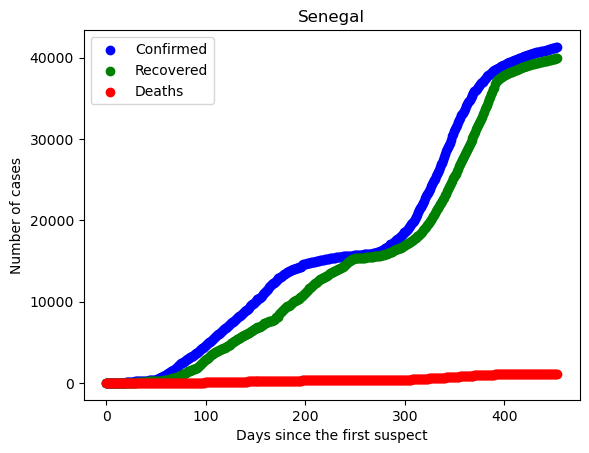

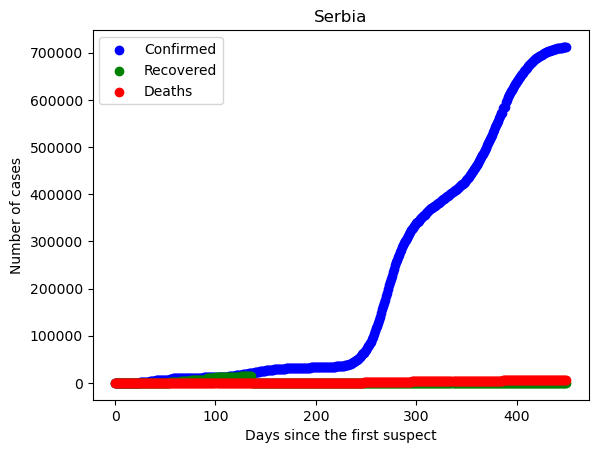

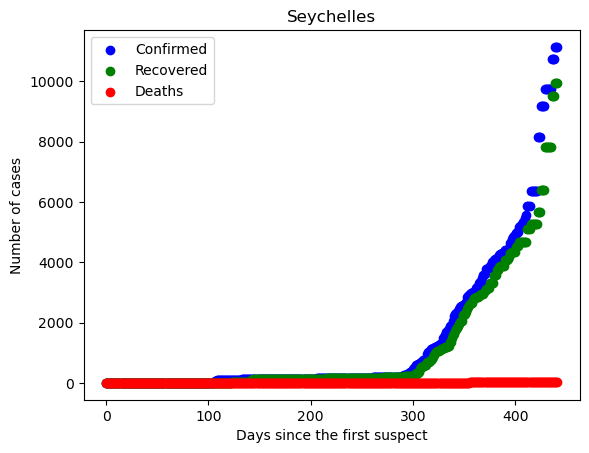

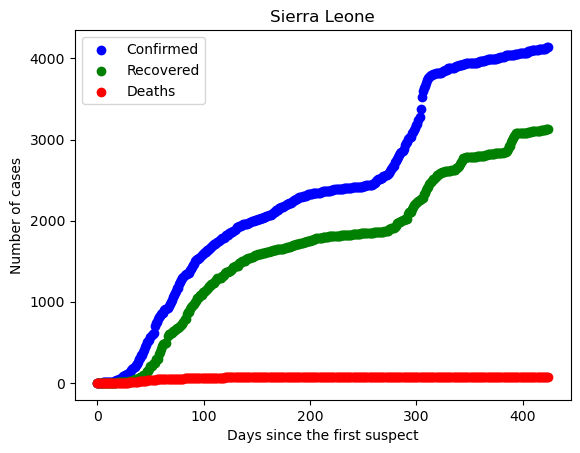

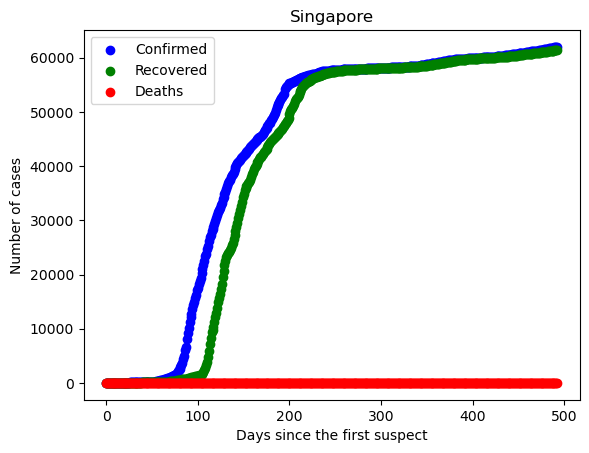

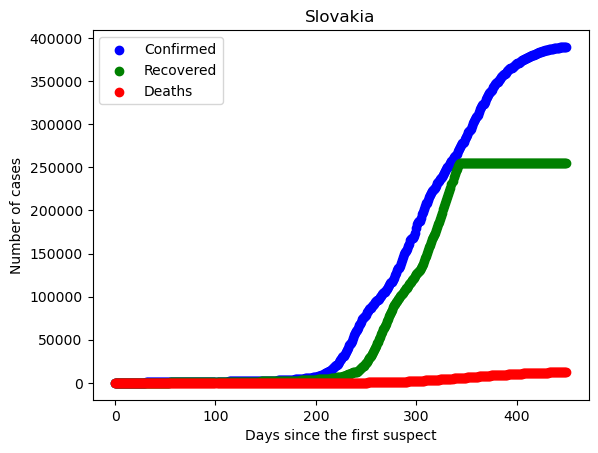

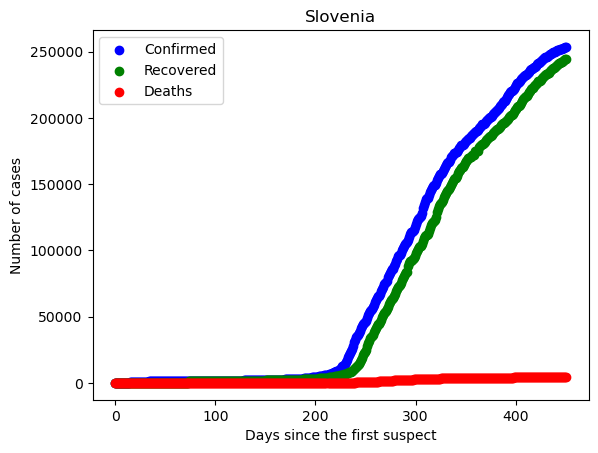

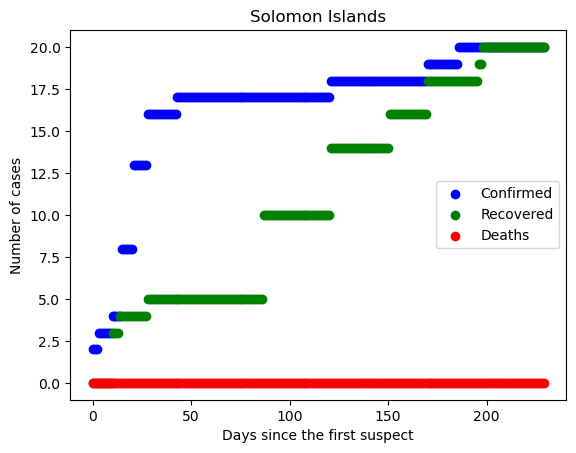

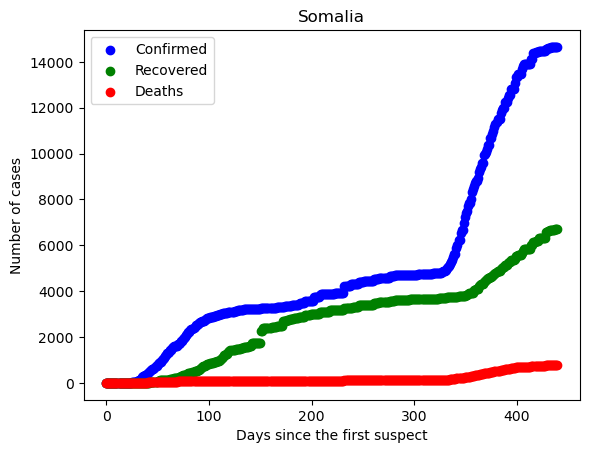

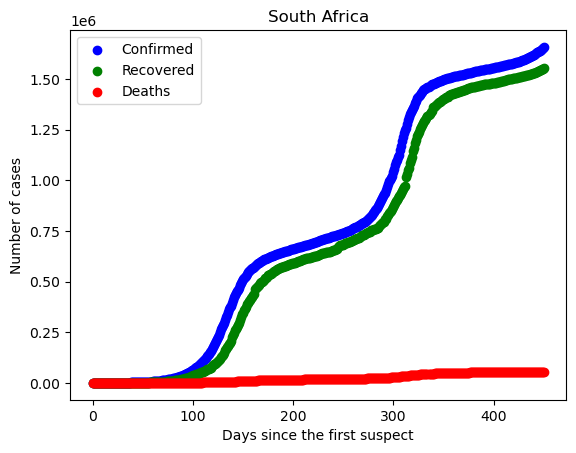

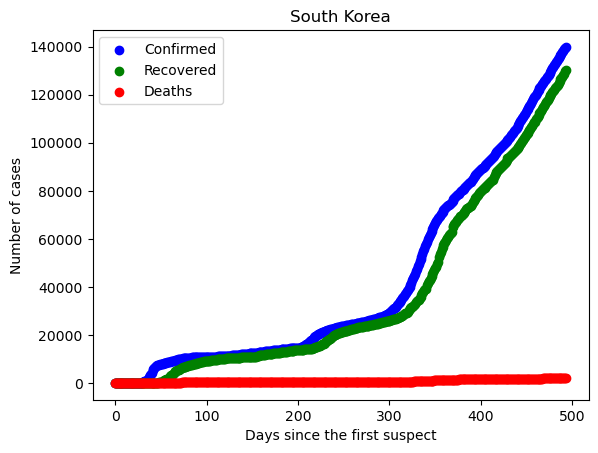

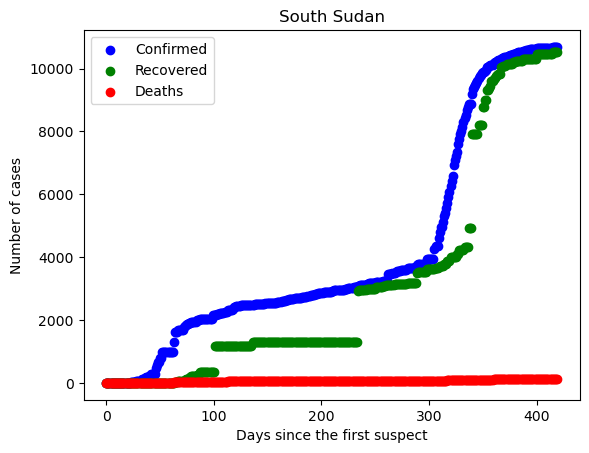

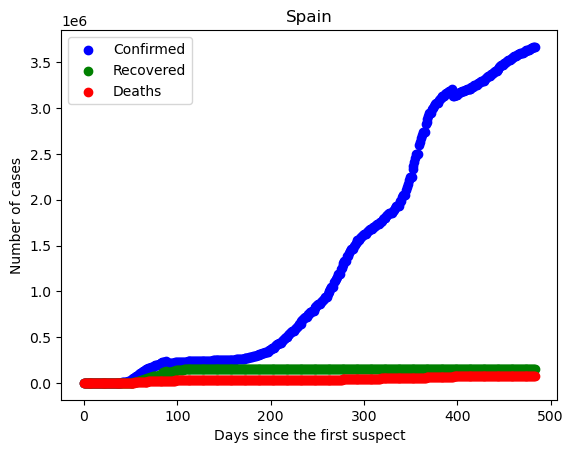

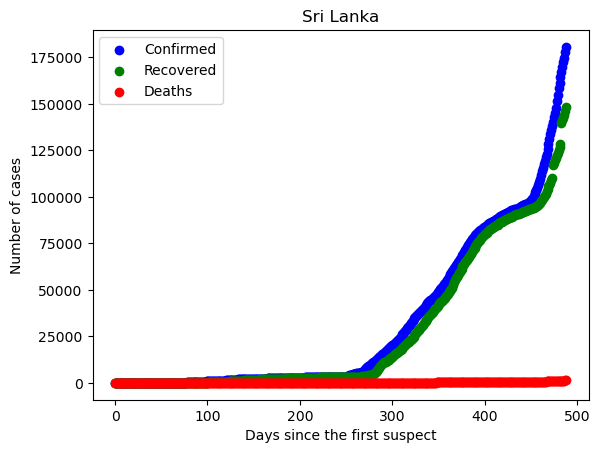

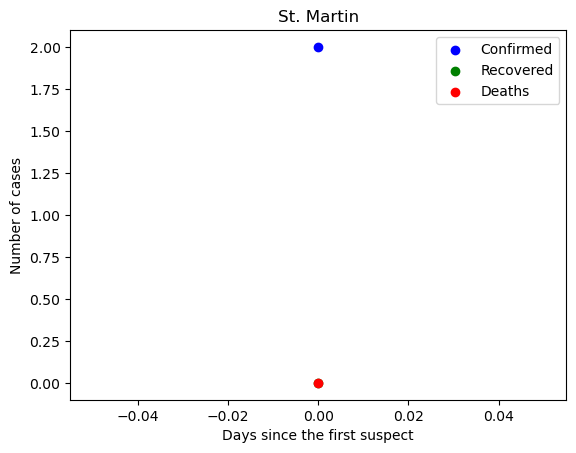

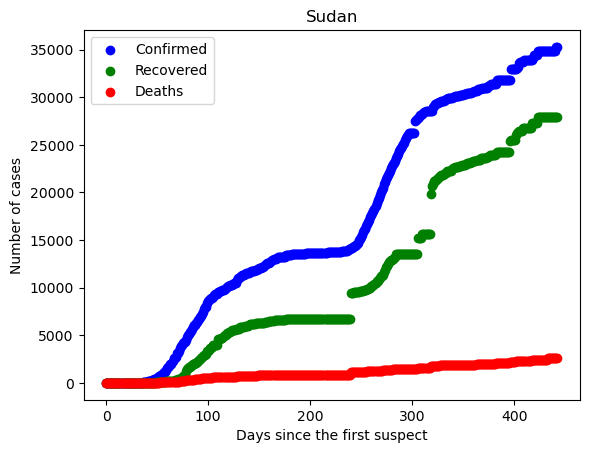

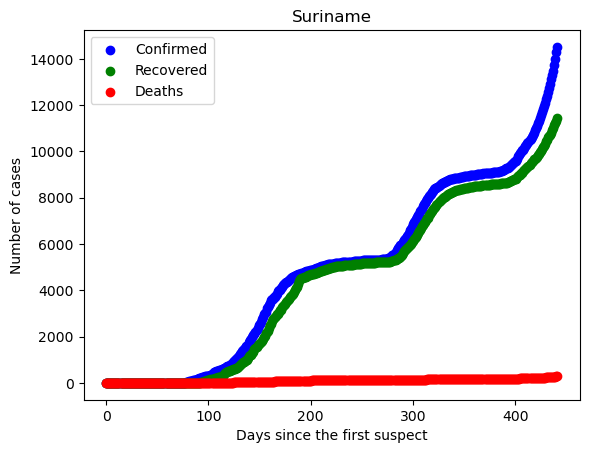

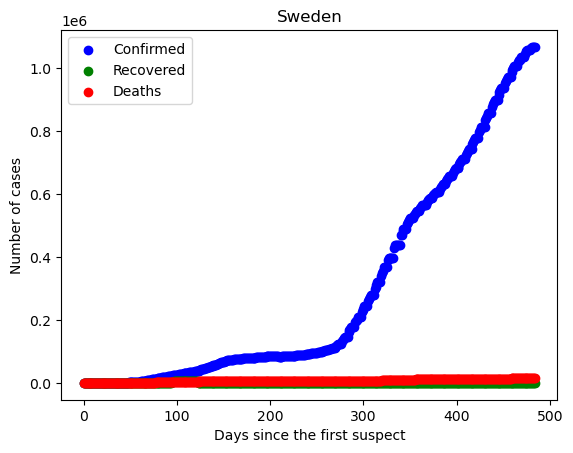

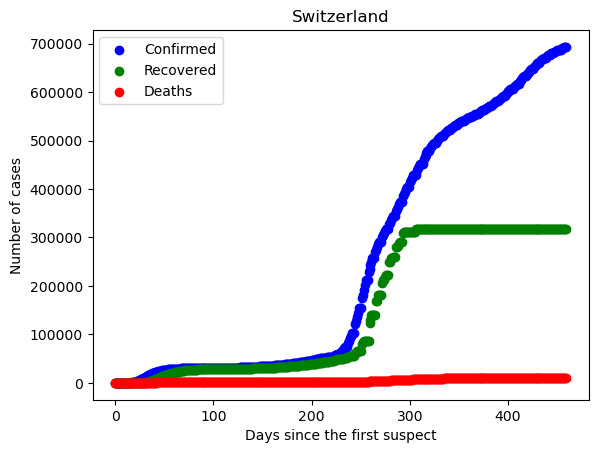

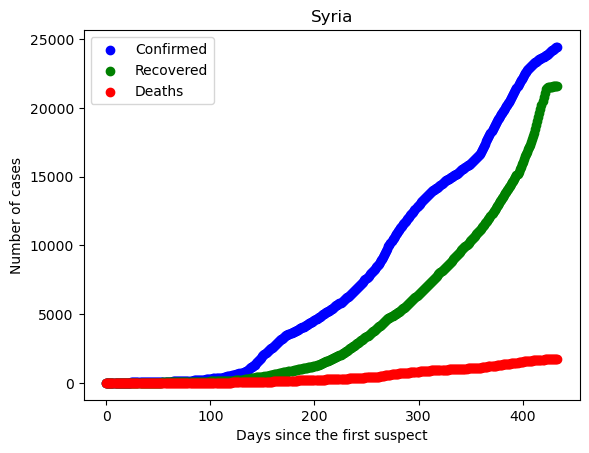

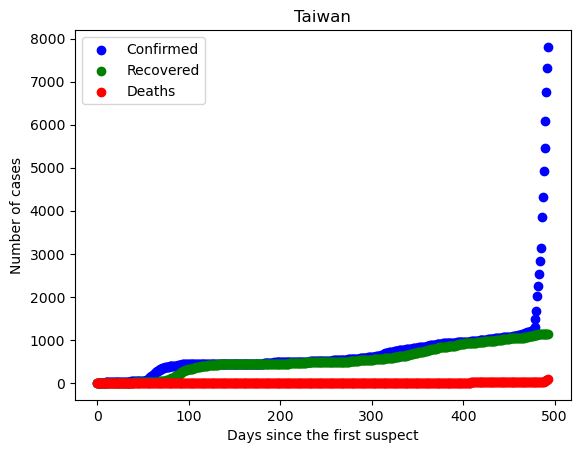

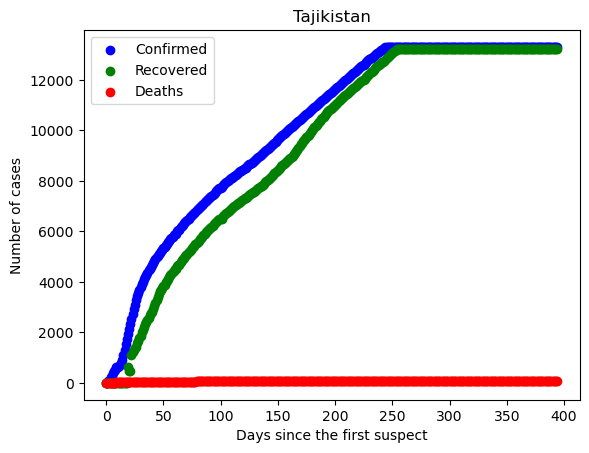

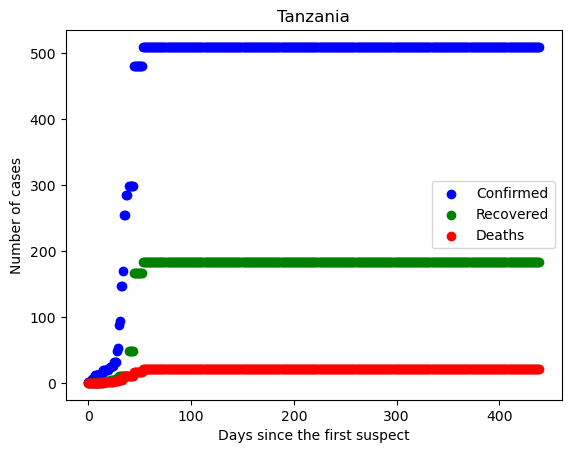

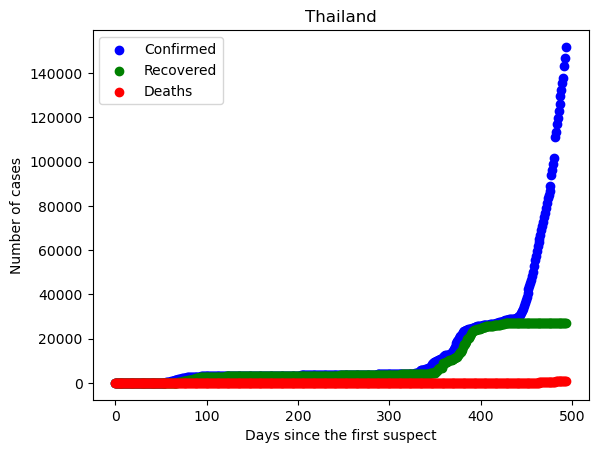

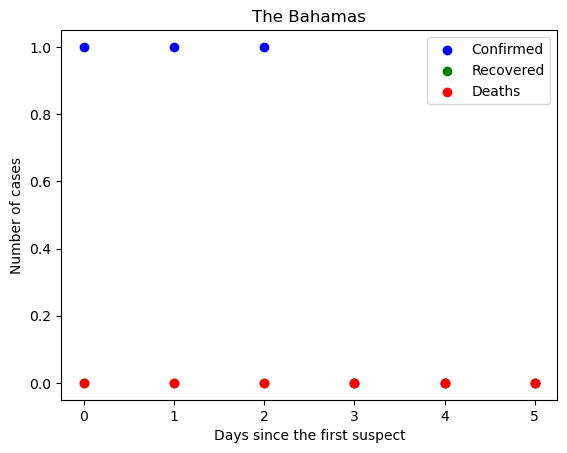

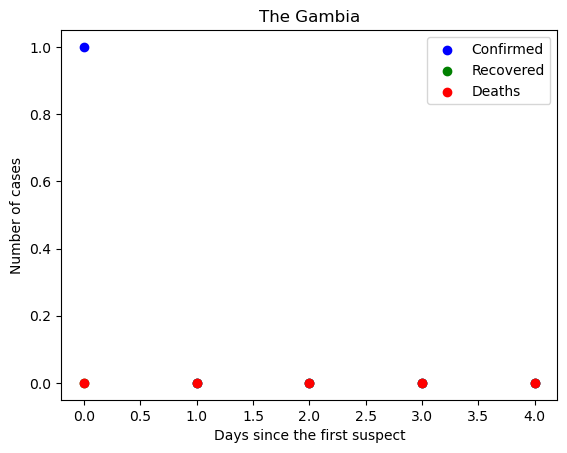

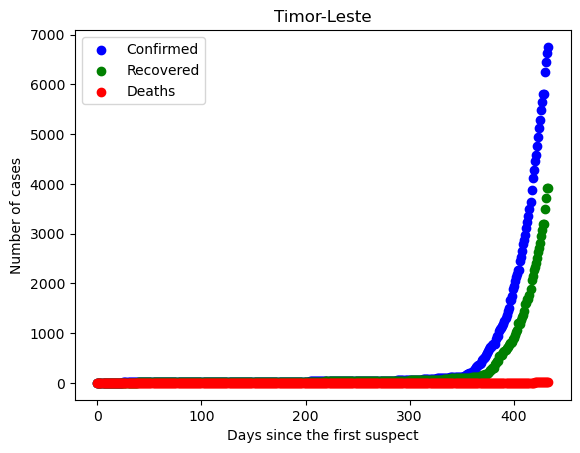

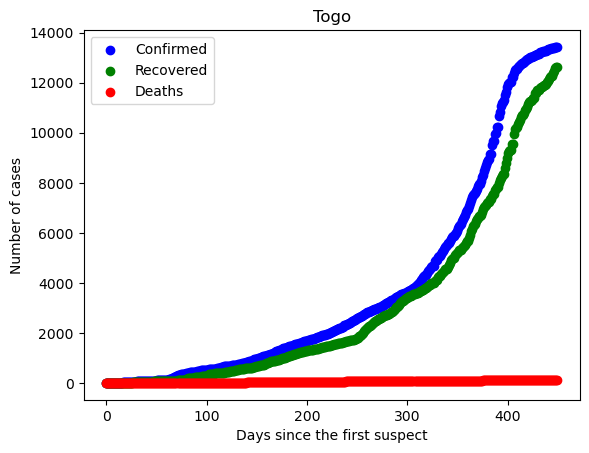

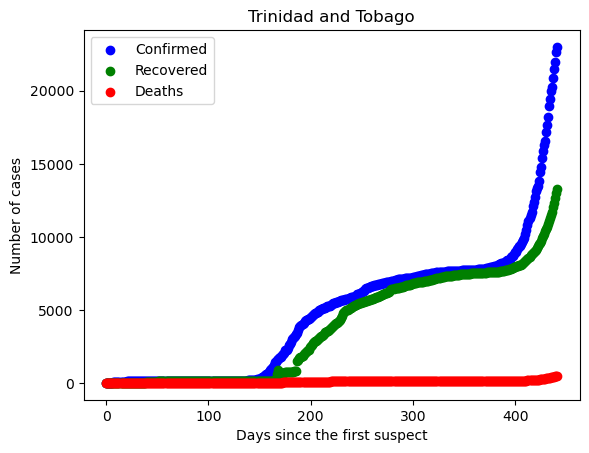

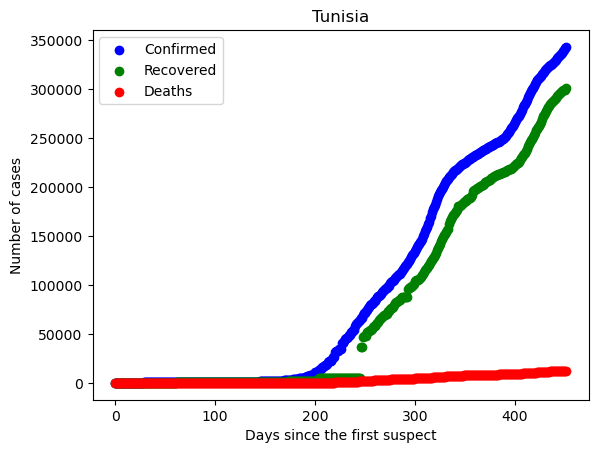

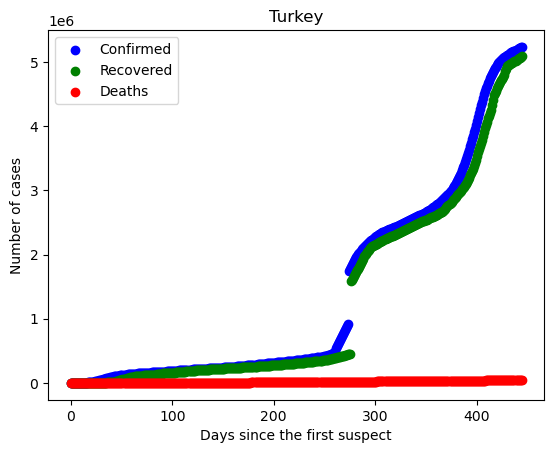

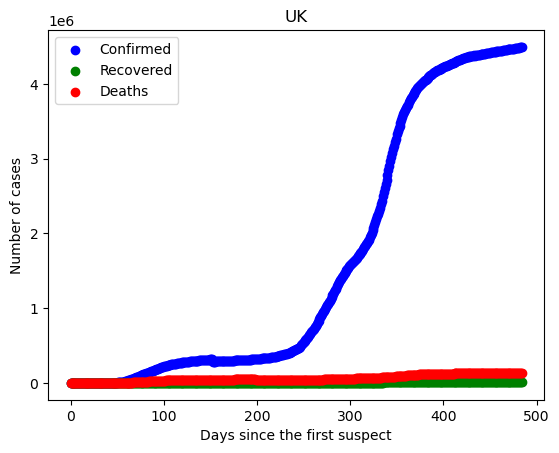

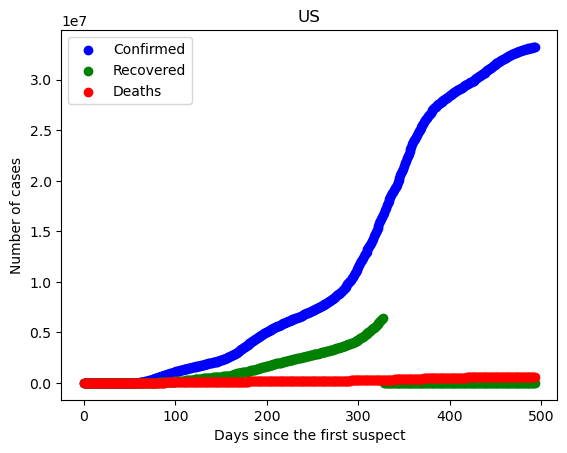

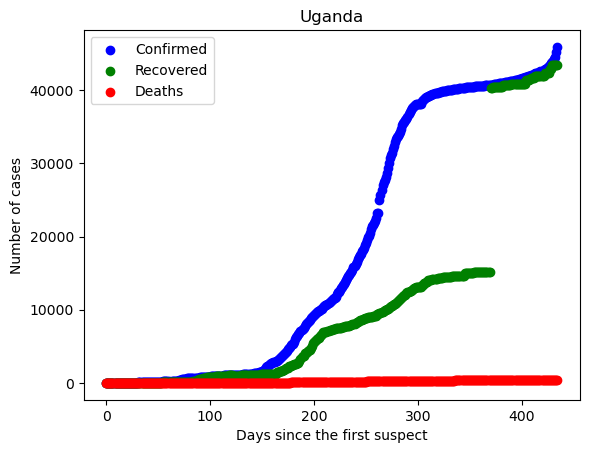

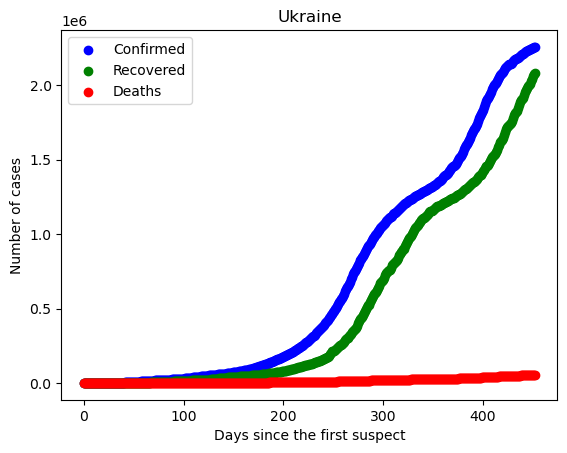

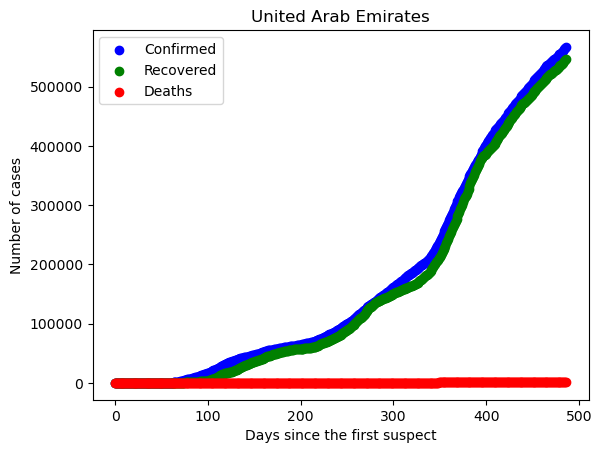

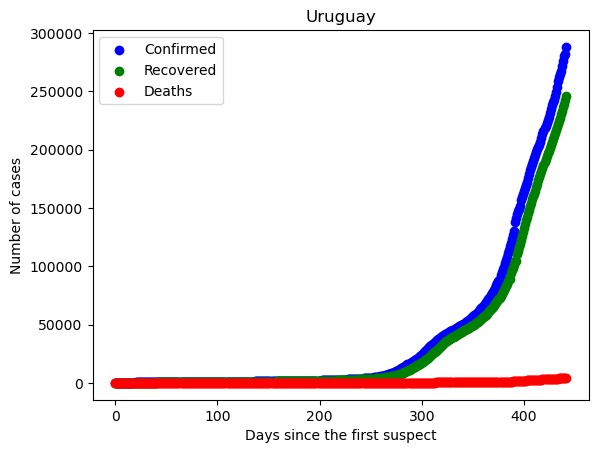

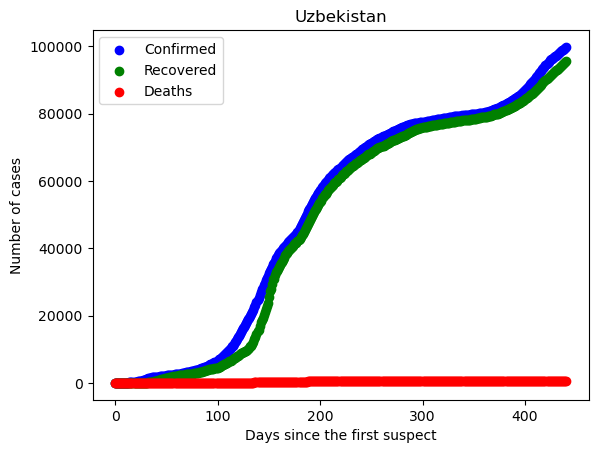

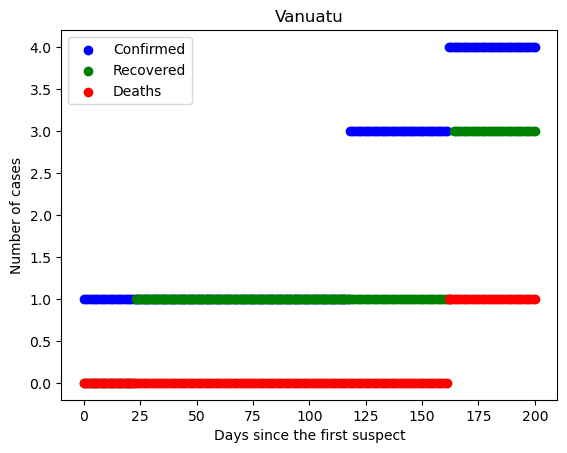

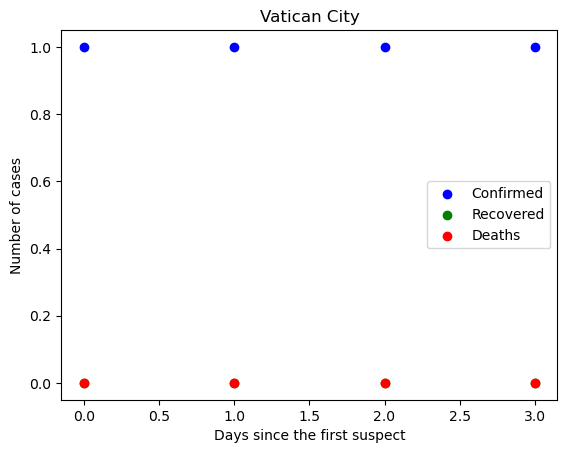

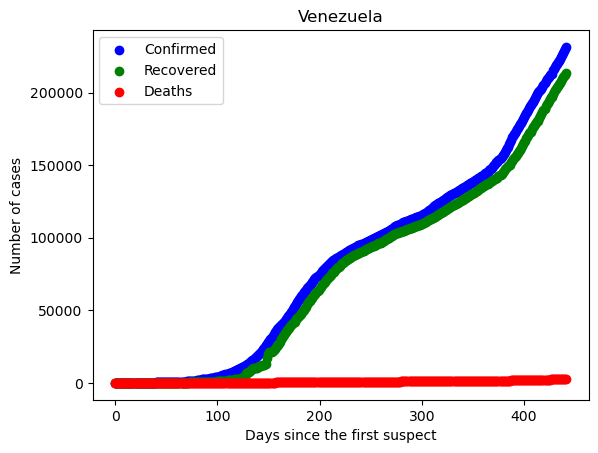

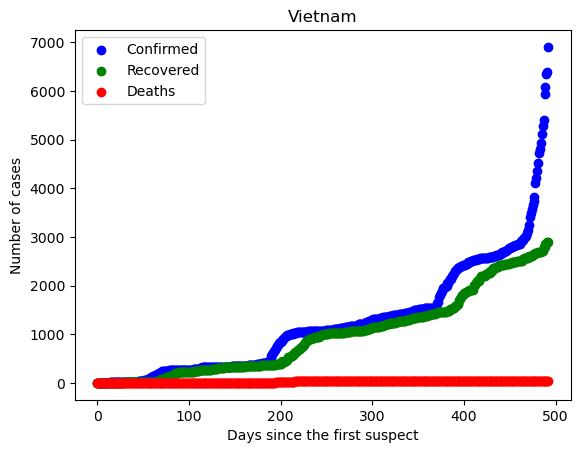

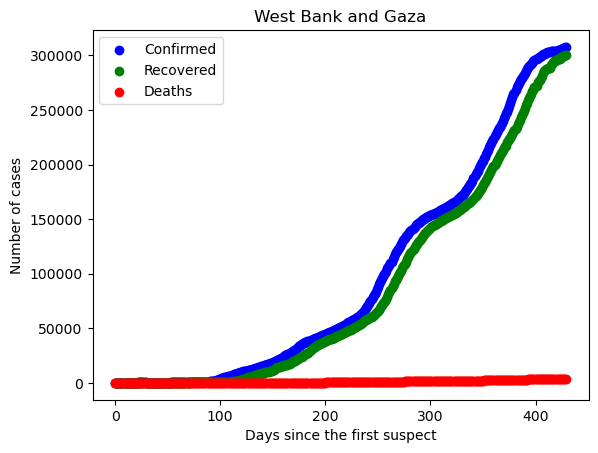

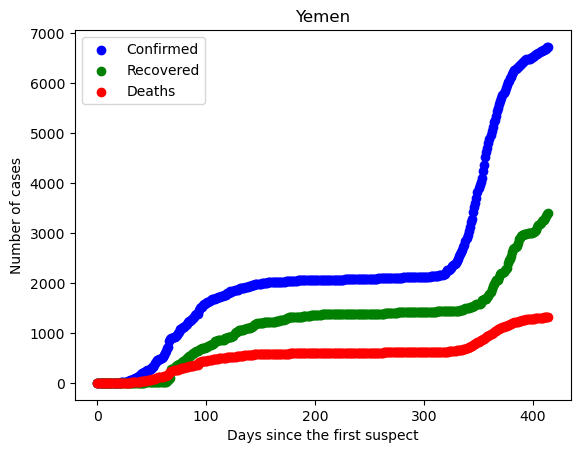

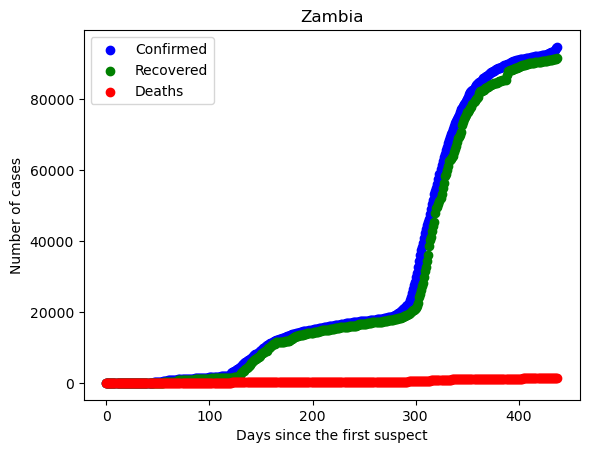

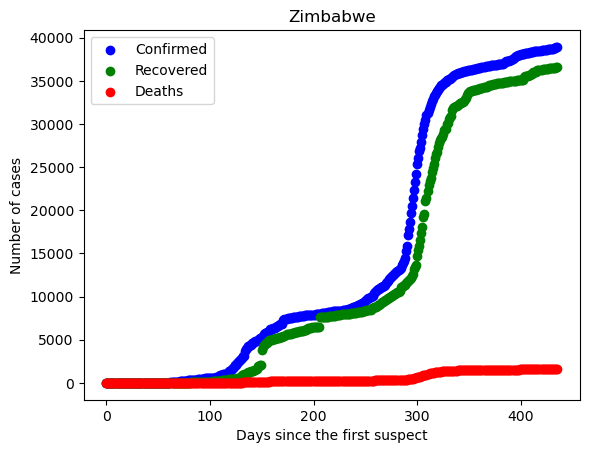

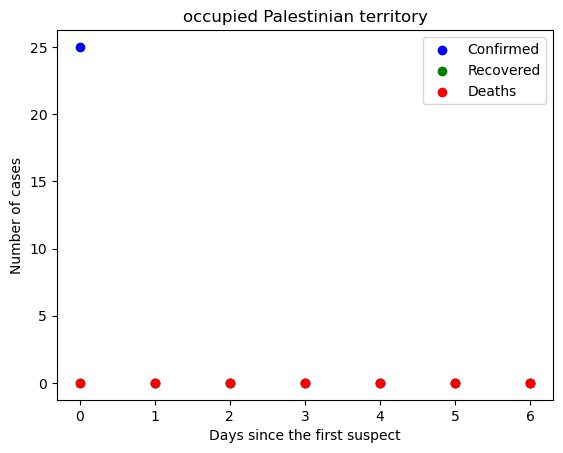

In [70]:
for idx in range(len(countries)):
    c = df3[df3['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(c)),c['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(c)),c['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(c)),c['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

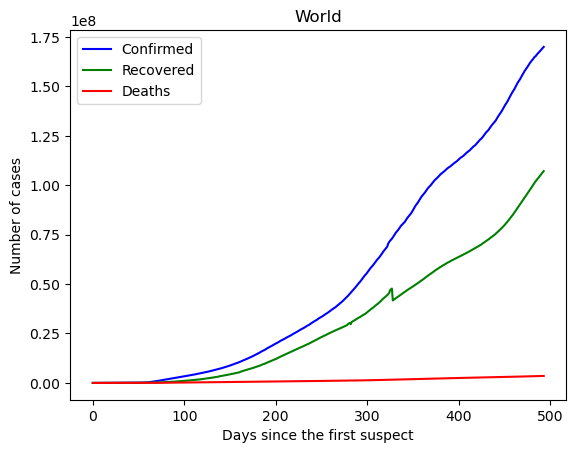

In [73]:
df4 = df3.groupby(['Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()
c = df4
plt.plot(np.arange(0,len(c)),c['Confirmed'],color='blue',label='Confirmed')
plt.plot(np.arange(0,len(c)),c['Recovered'],color='green',label='Recovered')
plt.plot(np.arange(0,len(c)),c['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()